# Выявление невыгодных источников трафика


Необходимо выявить невыгодные источники трафика, это позволит маркетологам снизить расходы и перераспределить бюджет.


## Изучение данных из файла

### Визиты

In [1]:
import pandas as pd
from IPython.display import display
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

visit= pd.read_csv('/datasets/visits_log.csv')


visit.info()
display(visit.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

In [2]:
visit['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

<div class="alert alert-info">
<b> </b>  
В таблице нет пропусков, у данных с датами надо изменить формат и удалить дубликаты, если есть.
    
Необходимо удалить строки с ошибкой, например, когда дата/время окончания сессии меньше начала.     

</div>

In [3]:
visit = visit.drop_duplicates().reset_index(drop=True)
visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
visit = visit.rename(columns=
                   {
                       'Device': 'device',
                       'End Ts': 'end_ts',
                       'Source Id': 'source_id',
                       'Start Ts': 'start_ts',
                       'Uid': 'uid',
                   }
                  )

In [5]:
visit['source_id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source_id, dtype: int64

<div class="alert alert-info">
<b> </b>  
6 и 7 источники практически не были задействованы.    

</div>

In [6]:
visit['end_ts'] = pd.to_datetime(visit['end_ts'], format='%Y-%m-%d %H:%M:%S')
visit['start_ts'] = pd.to_datetime(visit['start_ts'], format='%Y-%m-%d %H:%M:%S')
visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [7]:
visit=visit[visit['end_ts']>visit['start_ts']]
visit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323604 entries, 0 to 359399
Data columns (total 5 columns):
device       323604 non-null object
end_ts       323604 non-null datetime64[ns]
source_id    323604 non-null int64
start_ts     323604 non-null datetime64[ns]
uid          323604 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 14.8+ MB


### Заказы

In [8]:
orders= pd.read_csv('/datasets/orders_log.csv')

orders.info()
display(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

<div class="alert alert-info">
<b> </b>  
Пропущенных значений в таблице нет.
    
Поменяем столбец с временем покупки на формат даты и удалим дубликаты, если есть.

</div>

In [9]:
orders = orders.drop_duplicates().reset_index(drop=True)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [10]:
orders = orders.rename(columns=
                   {
                       'Buy Ts': 'buy_ts',
                       'Revenue': 'revenue',
                       'Uid': 'uid',
                   }
                  )

In [11]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format='%Y-%m-%d %H:%M:%S')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [12]:
orders['buy_ts'].describe() 

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object

In [13]:
orders=orders.query('buy_ts != "2018-06-01 00:02:00"')
orders['buy_ts'].describe() 


count                   50414
unique                  45990
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-05-31 23:56:00
Name: buy_ts, dtype: object

### Расходы

In [14]:
costs= pd.read_csv('/datasets/costs.csv')
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08

In [15]:
costs = costs.drop_duplicates().reset_index(drop=True)
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [16]:
costs = costs.rename(columns=
                   {
                       'dt': 'costs_ts',
                   }
                  )

In [17]:
costs['costs_ts'] = pd.to_datetime(costs['costs_ts'], format='%Y-%m-%d')
#Выделим месяцы из дат в таблицах с расходами
costs['month'] = costs['costs_ts'].astype('datetime64[M]') 
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 4 columns):
source_id    2542 non-null int64
costs_ts     2542 non-null datetime64[ns]
costs        2542 non-null float64
month        2542 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 79.6 KB


source_id   costs_ts  costs      month
0          1 2017-06-01  75.20 2017-06-01
1          1 2017-06-02  62.25 2017-06-01
2          1 2017-06-03  36.53 2017-06-01
3          1 2017-06-04  55.00 2017-06-01
4          1 2017-06-05  57.08 2017-06-01

In [18]:
costs['costs_ts'].describe() 

count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: costs_ts, dtype: object

In [19]:
costs['source_id'].value_counts()

5     364
9     363
3     363
1     363
10    363
4     363
2     363
Name: source_id, dtype: int64

In [20]:
visit=visit.query('source_id != 6')
visit=visit.query('source_id != 7')
visit['source_id'].value_counts()

4     90896
3     76584
5     59520
2     43468
1     32146
9     11979
10     8971
Name: source_id, dtype: int64

<div class="alert alert-info">
<b> </b>  
Пропусков и дубликатов в данных не было.
    
В данных с визитами удалили строки с ошибкой, когда дата/время окончания сессии меньше начала. 
    
Так как среди оплаченных источников нет 6 и 7, убрали визиты с этих источников.
    
Столбцы с датами/временем перевели в формат дат.

</div>

## Продуктовые метрики

### DAU, WAU, MAU

In [21]:
#visit['start_year']  = visit['start_ts'].dt.year
visit['start_month'] = visit['start_ts'].dt.month
visit['start_week'] = visit['start_ts'].dt.week
visit['start_date'] = visit['start_ts'].dt.date
visit['start_date']=pd.to_datetime(visit['start_date'])

display(visit.head())
visit.info()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
5  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
6  desktop 2018-01-30 12:09:00          1 2018-01-30 11:13:00   

                    uid  start_month  start_week start_date  
0  16879256277535980062           12          51 2017-12-20  
1    104060357244891740            2           8 2018-02-19  
3  16174680259334210214            5          20 2018-05-20  
5  16007536194108375387            9          35 2017-09-03  
6   6661610529277171451            1           5 2018-01-30

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323564 entries, 0 to 359399
Data columns (total 8 columns):
device         323564 non-null object
end_ts         323564 non-null datetime64[ns]
source_id      323564 non-null int64
start_ts       323564 non-null datetime64[ns]
uid            323564 non-null uint64
start_month    323564 non-null int64
start_week     323564 non-null int64
start_date     323564 non-null datetime64[ns]
dtypes: datetime64[ns](3), int64(3), object(1), uint64(1)
memory usage: 22.2+ MB


In [22]:
dau_total  = visit.groupby('start_date').agg({'uid': 'nunique'}).mean()
int(dau_total)

817

<div class="alert alert-info">
<b> </b>  
Количество уникальных пользователей в день - 817 человек.
</div>

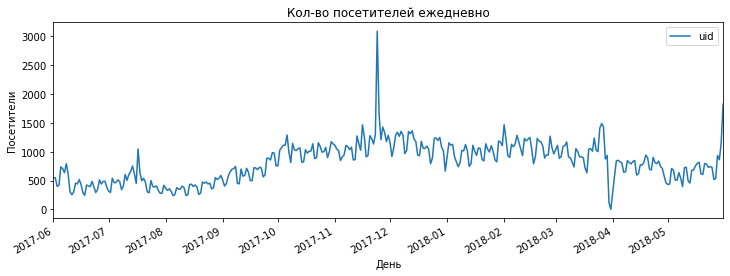

In [23]:
visit.groupby('start_date').agg({'uid': 'nunique'}).plot(kind='line', figsize=(12,4)).set_title('Кол-во посетителей ежедневно')
plt.xlabel("День") 
plt.ylabel("Посетители");

In [24]:
visit_dau = visit.groupby('start_date').agg({'uid': 'nunique'})
print(visit_dau[visit_dau['uid']>1200])
print(visit_dau[visit_dau['uid']>3000])
print(visit_dau[visit_dau['uid']>2000])
visit_dau[visit_dau['uid']<300]

             uid
start_date      
2017-10-06  1290
2017-11-13  1274
2017-11-16  1466
2017-11-17  1258
2017-11-20  1279
2017-11-21  1229
2017-11-23  1299
2017-11-24  3090
2017-11-25  1670
2017-11-26  1208
2017-11-27  1429
2017-11-28  1338
2017-11-30  1285
2017-12-04  1286
2017-12-05  1340
2017-12-06  1267
2017-12-07  1354
2017-12-08  1287
2017-12-11  1350
2017-12-12  1312
2017-12-13  1365
2017-12-14  1222
2017-12-25  1233
2017-12-26  1240
2017-12-28  1249
2018-02-01  1470
2018-02-02  1224
2018-02-08  1286
2018-02-12  1231
2018-02-14  1220
2018-02-15  1248
2018-02-19  1231
2018-02-26  1271
2018-03-22  1237
2018-03-25  1411
2018-03-26  1489
2018-03-27  1431
2018-05-31  1825
             uid
start_date      
2017-11-24  3090
             uid
start_date      
2017-11-24  3090


uid
start_date     
2017-06-11  254
2017-06-17  292
2017-06-18  244
2017-06-24  293
2017-07-02  293
2017-07-23  288
2017-07-29  280
2017-07-30  279
2017-08-05  238
2017-08-06  258
2017-08-12  244
2017-08-13  250
2017-08-19  260
2017-08-20  284
2018-03-30  116
2018-03-31    1

<div class="alert alert-info">
<b> </b>  
Количество посетителей значительно возрастает 24 ноября, 3090 посетителя за этот день.
Это может быть связано с днем матери, который 25 ноября.
    
А также есть рост посещений 31 мая, 1825 посетителей за этот день.
Это может быть связано с днем ребенка, который 1 июня.    
    
Если обобщить до месяцев, бОльшая посещаемость в ноябре- декабре и немного меньше февраль-март
    
Самая низкая посещаемость 30 и 31 марта, и в целом в летние месяцы.
</div>

In [25]:
visit.groupby('start_date').agg({'uid': 'nunique'})['uid'].reset_index().sort_values(by = 'uid', ascending = False).head(10)

start_date   uid
176 2017-11-24  3090
363 2018-05-31  1825
177 2017-11-25  1670
298 2018-03-26  1489
245 2018-02-01  1470
168 2017-11-16  1466
299 2018-03-27  1431
179 2017-11-27  1429
297 2018-03-25  1411
195 2017-12-13  1365

In [26]:
wau_total  = visit.groupby('start_week').agg({'uid': 'nunique'}).mean()
int(wau_total)

5245

<div class="alert alert-info">
<b> </b>  
Количество уникальных пользователей в неделю - 5245 человек.
</div>

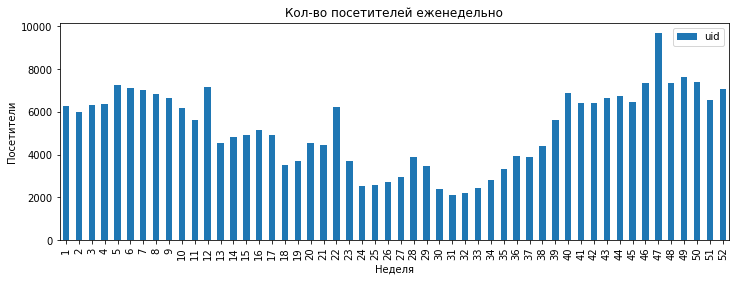

In [27]:
visit.groupby('start_week').agg({'uid': 'nunique'}).plot(kind='bar', figsize=(12,4)).set_title('Кол-во посетителей еженедельно')
plt.xlabel("Неделя") 
plt.ylabel("Посетители"); 

<div class="alert alert-info">
<b> </b>  
Недельный график посещаемости подтверждает информацию о том, что в середине года, т.е. в летние месяцы значительно меньше заходов.
Конец года (последние 13 недель) и начало года - самые посещаемые.
</div>

In [28]:
mau_total = visit.groupby('start_month').agg({'uid': 'nunique'}).mean()
int(mau_total)

20952

<div class="alert alert-info">
<b> </b>  
Количество уникальных пользователей в месяц - 20952 человека.
</div>

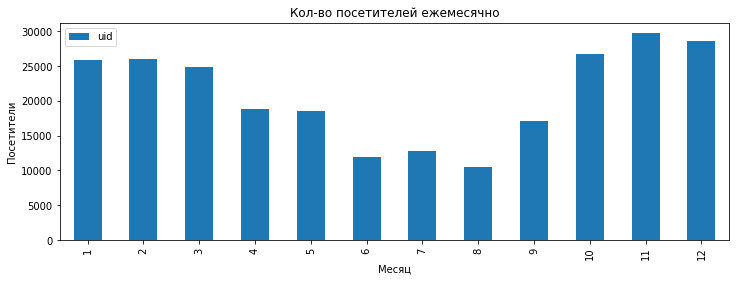

In [29]:
visit.groupby('start_month').agg({'uid': 'nunique'}).plot(kind='bar', figsize=(12,4)).set_title('Кол-во посетителей ежемесячно')
plt.xlabel("Месяц") 
plt.ylabel("Посетители"); 


<div class="alert alert-info">
<b> </b>  
Месячный график наглядно выделяет период с сентября по март включительно, в эти месяцы сервис Афиша наиболее востребован.

</div>

### Сколько каждый пользователь в среднем заходит на сайт

In [30]:
visit.groupby('uid').agg({'start_ts': 'count'}).mean()

start_ts    1.562945
dtype: float64

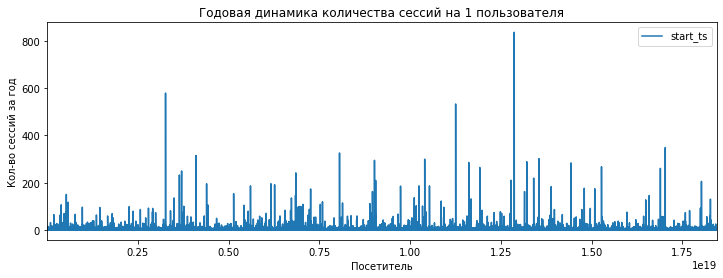

In [31]:
visit.groupby('uid').agg({'start_ts': 'count'}).plot(style = '-', figsize=(12,4)).set_title(
    'Годовая динамика количества сессий на 1 пользователя'
)
plt.xlabel("Посетитель") 
plt.ylabel("Кол-во сессий за год"); 

In [32]:
visit_year_uid=visit.groupby('uid').agg({'start_ts': 'count'}).reset_index()

visit_year_uid.sort_values(by = 'start_ts', ascending = False).head(15)

uid  start_ts
144592  12869801667763685675       836
36642    3263486045884611639       579
126584  11255648391090536411       533
191357  17030528792926543083       349
90690    8056418121947262981       326
46078    4103526784471735383       315
152191  13551952738594011920       302
116917  10403169074343195591       300
101367   9019681082555518724       295
148522  13216107653026783144       289
130625  11616947936617491261       286
162117  14435995954877181653       284
171571  15273714129857295034       268
133935  11920452646463905188       265
189845  16895737306928828916       261

In [33]:
visit_year_uid['start_ts'].value_counts().head(10)

1     160474
2      27915
3       9023
4       3890
5       1940
6       1088
7        686
8        423
9        310
10       200
Name: start_ts, dtype: int64

In [34]:
visit_year_uid.shape[0]

207022

In [35]:
visit_year_uid.query('start_ts>200').shape[0]

22

In [36]:
visit_year_uid.query('10<start_ts<=200').shape[0]

1051

In [37]:
visit_year_uid.query('start_ts<=10').shape[0]

205949

<div class="alert alert-info">
<b> % повторного пользования сервисом за год небольшой  </b>  
    
99,48% посетителей заходят на сайт не более 10 раз за год.
    
77.50% - 1 раз за год.  
    
13.50% - 2 раз за год.      
    
0,5% пользователей зашли от 10 до 200 раз за год.
    
У 22 человек из 201 022 пользователей кол-во сессий за год больше 200.

</div>

### Сколько времени пользователи на сайте

In [38]:
visit['long_dt']=visit['end_ts']-visit['start_ts']
display(visit['long_dt'].describe())
visit['long_dt'].mean()

count                    323564
mean     0 days 00:11:54.164900
std      0 days 00:17:06.321529
min             0 days 00:00:19
25%             0 days 00:02:00
50%             0 days 00:06:00
75%             0 days 00:15:00
max             0 days 11:51:00
Name: long_dt, dtype: object

Timedelta('0 days 00:11:54.164900')

<div class="alert alert-info">
<b> В среднем пользователи проводят около 11 минут на сайте</b>   
    
Половина пользователей - до 6 минут.
    
75% пользовотелей - до 15 минут.    
</div>

### Retention Rate

<div class="alert alert-info">
<b></b>
Определим событие и период — на их основе сформируем когорту. Возьмём дату, когда пользователь впервые проявил активность на сайте.
   
</div>

In [39]:
visit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323564 entries, 0 to 359399
Data columns (total 9 columns):
device         323564 non-null object
end_ts         323564 non-null datetime64[ns]
source_id      323564 non-null int64
start_ts       323564 non-null datetime64[ns]
uid            323564 non-null uint64
start_month    323564 non-null int64
start_week     323564 non-null int64
start_date     323564 non-null datetime64[ns]
long_dt        323564 non-null timedelta64[ns]
dtypes: datetime64[ns](3), int64(3), object(1), timedelta64[ns](1), uint64(1)
memory usage: 24.7+ MB


In [40]:
#найдем дату первого визита для каждого пользователя
first_activity_date = visit.groupby(['uid'])['start_date'].min()
first_activity_date.name = 'first_activity_date'
visit = visit.join(first_activity_date,on='uid') 
visit.head()
visit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323564 entries, 0 to 359399
Data columns (total 10 columns):
device                 323564 non-null object
end_ts                 323564 non-null datetime64[ns]
source_id              323564 non-null int64
start_ts               323564 non-null datetime64[ns]
uid                    323564 non-null uint64
start_month            323564 non-null int64
start_week             323564 non-null int64
start_date             323564 non-null datetime64[ns]
long_dt                323564 non-null timedelta64[ns]
first_activity_date    323564 non-null datetime64[ns]
dtypes: datetime64[ns](4), int64(3), object(1), timedelta64[ns](1), uint64(1)
memory usage: 27.2+ MB


<div class="alert alert-info">
<b></b>

Теперь для каждой строки датафрейма можно рассчитать lifetime пользователя в рамках когорты
   
</div>

In [41]:
visit['start_date_month'] = visit['start_date'].astype('datetime64[M]')
visit['first_date_month'] = visit['first_activity_date'].astype('datetime64[M]')

In [42]:
visit['cohort_lifetime'] = ((
    visit['start_date_month']
    - visit['first_date_month']
) / np.timedelta64(1, 'M')).round().astype('int')

visit['cohort_lifetime'].value_counts()

0     242516
1      20816
2      13143
3      10623
4       8760
5       7414
6       6003
7       4624
8       3565
9       2719
10      1939
11      1442
Name: cohort_lifetime, dtype: int64

<div class="alert alert-info">
<b></b>

Сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных пользователей на определённый «месяц жизни»
   
</div>



In [43]:
cohorts = visit.groupby(['first_date_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts

first_date_month  cohort_lifetime    uid
0        2017-06-01                0  11883
1        2017-06-01                1    900
2        2017-06-01                2    605
3        2017-06-01                3    710
4        2017-06-01                4    777
..              ...              ...    ...
73       2018-03-01                1    766
74       2018-03-01                2    480
75       2018-04-01                0  14214
76       2018-04-01                1    675
77       2018-05-01                0  13826

[78 rows x 3 columns]

<div class="alert alert-info">
<b></b>

Чтобы найти Retention Rate, нужно сперва получить число пользователей, изначально бывших в когорте, и на него разделить число пользователей в каждый следующий месяц.
Найдём исходное количество пользователей в когорте. Возьмём их число на нулевой месяц
</div>

In [44]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][
    ['first_date_month', 'uid']
]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_uid'}) 
initial_users_count


first_date_month  cohort_uid
0        2017-06-01       11883
12       2017-07-01       11822
23       2017-08-01        9213
33       2017-09-01       15123
42       2017-10-01       23534
50       2017-11-01       24851
57       2017-12-01       23021
63       2018-01-01       20570
68       2018-02-01       20173
72       2018-03-01       18792
75       2018-04-01       14214
77       2018-05-01       13826

<div class="alert alert-info">
<b></b>

Объединим данные по когортам с исходным количеством пользователей в когорте
</div>

In [45]:
cohorts = cohorts.merge(initial_users_count,on='first_date_month') 
cohorts.head()

first_date_month  cohort_lifetime    uid  cohort_uid
0       2017-06-01                0  11883       11883
1       2017-06-01                1    900       11883
2       2017-06-01                2    605       11883
3       2017-06-01                3    710       11883
4       2017-06-01                4    777       11883

<div class="alert alert-info">
<b></b>

Рассчитаем Retention Rate. Разделим количество активных пользователей в каждую из недель на исходное число пользователей в когорте
</div>

In [46]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_uid'] 

<div class="alert alert-info">
<b></b>

Построим сводную таблицу и создадим тепловую карту
</div>

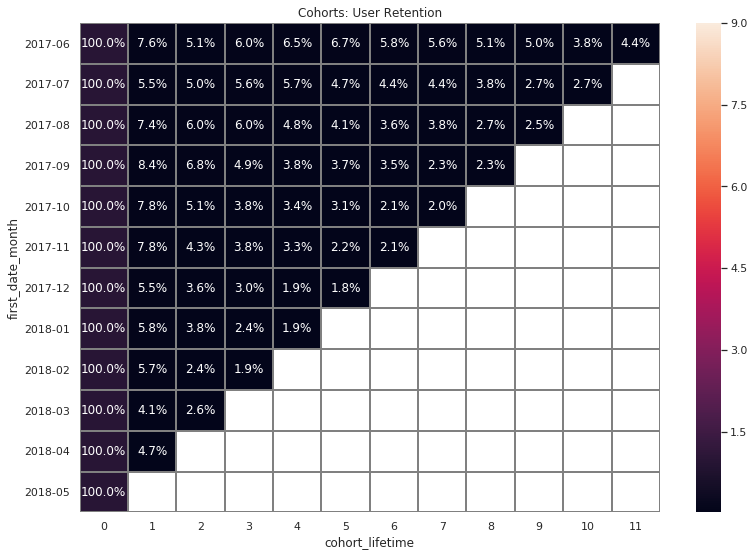

In [47]:
cohorts['first_date_month']=cohorts['first_date_month'].dt.strftime('%Y-%m')

retention_pivot = cohorts.pivot_table(
    index='first_date_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
)


sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=9); 


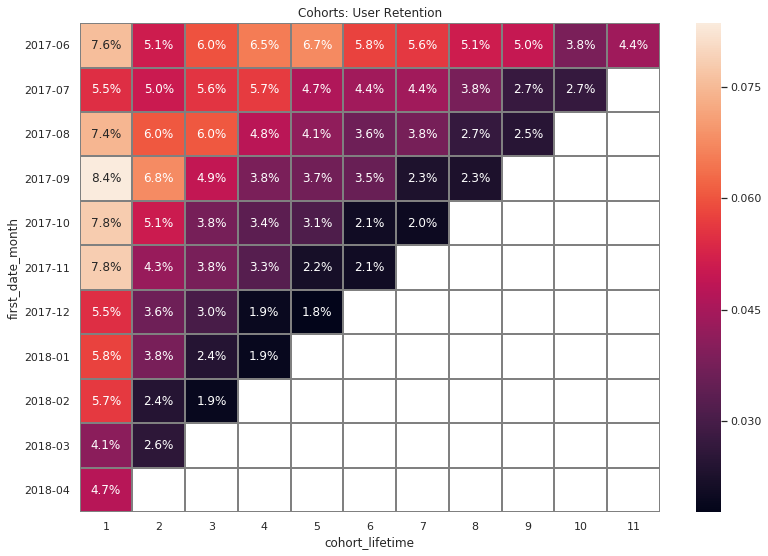

In [48]:
retention_pivot_2 = cohorts.loc[cohorts['cohort_lifetime']>0].pivot_table(
    index='first_date_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
)


sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot_2, annot=True, fmt='.1%', linewidths=1, linecolor='gray'); 


In [49]:
retention_pivot.fillna('') 

cohort_lifetime    0          1          2          3          4          5   \
first_date_month                                                               
2017-06           1.0  0.0757384  0.0509131  0.0597492  0.0653875  0.0674914   
2017-07           1.0  0.0545593  0.0504145  0.0556589   0.056674  0.0465234   
2017-08           1.0  0.0743515   0.060458   0.060458  0.0479757  0.0414631   
2017-09           1.0  0.0835813  0.0677776  0.0493288  0.0380877  0.0369636   
2017-10           1.0  0.0781423  0.0508201  0.0377751  0.0336534  0.0311889   
2017-11           1.0   0.078186  0.0427347  0.0378254  0.0325943  0.0217295   
2017-12           1.0  0.0546892  0.0364884  0.0301898  0.0194605  0.0177229   
2018-01           1.0  0.0578026  0.0378221  0.0243559  0.0192513              
2018-02           1.0  0.0565607  0.0242899  0.0191841                         
2018-03           1.0   0.040762  0.0255428                                    
2018-04           1.0  0.0474884                                               
2018-05           1.0                                                          

cohort_lifetime          6          7          8          9          10  \
first_date_month                                                          
2017-06           0.0577295  0.0561306  0.0509972  0.0497349  0.0381217   
2017-07           0.0440704  0.0440704  0.0378954  0.0273219  0.0270682   
2017-08           0.0362531  0.0376642  0.0271356  0.0247476              
2017-09           0.0353766  0.0228791  0.0227468                         
2017-10           0.0207784  0.0198011                                    
2017-11           0.0206028                                               
2017-12                                                                   
2018-01                                                                   
2018-02                                                                   
2018-03                                                                   
2018-04                                                                   
2018-05                                                                   

cohort_lifetime          11  
first_date_month             
2017-06           0.0439283  
2017-07                      
2017-08                      
2017-09                      
2017-10                      
2017-11                      
2017-12                      
2018-01                      
2018-02                      
2018-03                      
2018-04                      
2018-05

<div class="alert alert-info">
<b>Средний Retention Rate на второй месяц "жизни" когорт</b>


</div>

In [50]:
(retention_pivot[1].mean())*100


6.380561330947556

<div class="alert alert-info">
<b>Только 6,5% пользователей в среднем относительно их изначального числа вернулось во второй месяц</b>

</div>

<div class="alert alert-info">
<b>Максимальный Retention Rate 8,4%</b>
Retention Rate по всем когортам снижается.
Привлечённые пользователи пользуется сервисов повторно неохотно, что не очень хорошо для потенциальной выручки.    
</div>

## Метрики электронной коммерции

### Время от первого посещения до первой покупки

In [51]:
print(visit.info())
visit.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323564 entries, 0 to 359399
Data columns (total 13 columns):
device                 323564 non-null object
end_ts                 323564 non-null datetime64[ns]
source_id              323564 non-null int64
start_ts               323564 non-null datetime64[ns]
uid                    323564 non-null uint64
start_month            323564 non-null int64
start_week             323564 non-null int64
start_date             323564 non-null datetime64[ns]
long_dt                323564 non-null timedelta64[ns]
first_activity_date    323564 non-null datetime64[ns]
start_date_month       323564 non-null datetime64[ns]
first_date_month       323564 non-null datetime64[ns]
cohort_lifetime        323564 non-null int64
dtypes: datetime64[ns](6), int64(4), object(1), timedelta64[ns](1), uint64(1)
memory usage: 34.6+ MB
None


device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
5  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
6  desktop 2018-01-30 12:09:00          1 2018-01-30 11:13:00   

                    uid  start_month  start_week start_date  long_dt  \
0  16879256277535980062           12          51 2017-12-20 00:18:00   
1    104060357244891740            2           8 2018-02-19 00:28:00   
3  16174680259334210214            5          20 2018-05-20 00:24:00   
5  16007536194108375387            9          35 2017-09-03 00:01:00   
6   6661610529277171451            1           5 2018-01-30 00:56:00   

  first_activity_date start_date_month first_date_month  cohort_lifetime  
0          2017-12-20       2017-12-01       2017-12-01                0  
1          2018-02-19       2018-02-01       2018-02-01                0  
3          2018-03-09       2018-05-01       2018-03-01                2  
5          2017-09-03       2017-09-01       2017-09-01                0  
6          2017-06-29       2018-01-01       2017-06-01                7

In [52]:
first_start_visit  = visit.groupby('uid').agg({'start_ts': 'min'}).reset_index()
first_start_visit = first_start_visit.rename(columns=
                   {
                       'start_ts': 'first_start_visit',
                   }
                  )
print(first_start_visit.info())
first_start_visit.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207022 entries, 0 to 207021
Data columns (total 2 columns):
uid                  207022 non-null uint64
first_start_visit    207022 non-null datetime64[ns]
dtypes: datetime64[ns](1), uint64(1)
memory usage: 3.2 MB
None


uid   first_start_visit
0   11863502262781 2018-03-01 17:27:00
1   49537067089222 2018-02-06 15:55:00
2  297729379853735 2017-06-07 18:47:00
3  313578113262317 2017-09-18 22:49:00
4  325320750514679 2017-09-30 14:29:00

In [53]:
print(orders.info())
orders.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50414 entries, 0 to 50413
Data columns (total 3 columns):
buy_ts     50414 non-null datetime64[ns]
revenue    50414 non-null float64
uid        50414 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.5 MB
None


buy_ts  revenue                   uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844
3 2017-06-01 00:29:00     0.55  16109239769442553005
4 2017-06-01 07:58:00     0.37  14200605875248379450

In [54]:
first_start_order  = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_start_order = first_start_order.rename(columns=
                   {
                       'buy_ts': 'first_start_order',
                   }
                  )

orders = orders.merge(first_start_order,on='uid', how='left') 
print(orders.info())
orders.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50414 entries, 0 to 50413
Data columns (total 4 columns):
buy_ts               50414 non-null datetime64[ns]
revenue              50414 non-null float64
uid                  50414 non-null uint64
first_start_order    50414 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), uint64(1)
memory usage: 1.9 MB
None


buy_ts  revenue                   uid   first_start_order
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00

In [55]:
orders = orders.merge(first_start_visit,on='uid', how='left') 
display(orders.head())
orders.info()

buy_ts  revenue                   uid   first_start_order  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

    first_start_visit  
0 2017-06-01 00:09:00  
1 2017-06-01 00:14:00  
2 2017-06-01 00:25:00  
3 2017-06-01 00:14:00  
4 2017-06-01 07:31:00

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50414 entries, 0 to 50413
Data columns (total 5 columns):
buy_ts               50414 non-null datetime64[ns]
revenue              50414 non-null float64
uid                  50414 non-null uint64
first_start_order    50414 non-null datetime64[ns]
first_start_visit    49939 non-null datetime64[ns]
dtypes: datetime64[ns](3), float64(1), uint64(1)
memory usage: 2.3 MB


In [56]:
orders['visit_order_max']=orders['first_start_order']-orders['first_start_visit']
orders=orders.query('first_start_order > first_start_visit')
display(orders.head())
orders.info()

buy_ts  revenue                   uid   first_start_order  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

    first_start_visit visit_order_max  
0 2017-06-01 00:09:00        00:01:00  
1 2017-06-01 00:14:00        00:11:00  
2 2017-06-01 00:25:00        00:02:00  
3 2017-06-01 00:14:00        00:15:00  
4 2017-06-01 07:31:00        00:27:00

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45612 entries, 0 to 50413
Data columns (total 6 columns):
buy_ts               45612 non-null datetime64[ns]
revenue              45612 non-null float64
uid                  45612 non-null uint64
first_start_order    45612 non-null datetime64[ns]
first_start_visit    45612 non-null datetime64[ns]
visit_order_max      45612 non-null timedelta64[ns]
dtypes: datetime64[ns](3), float64(1), timedelta64[ns](1), uint64(1)
memory usage: 2.4 MB


In [57]:
orders['visit_order_max'].describe()

count                      45612
mean     18 days 00:16:58.410944
std      46 days 17:25:33.513614
min              0 days 00:01:00
25%              0 days 00:06:00
50%              0 days 00:28:00
75%              5 days 01:45:30
max            363 days 07:04:00
Name: visit_order_max, dtype: object

In [58]:
orders.query('visit_order_max> "23:59:59"')['visit_order_max'].describe()

count                      15022
mean     54 days 13:19:32.136865
std      68 days 02:30:22.720028
min              1 days 00:00:00
25%              5 days 04:34:00
50%             21 days 23:05:00
75%             85 days 13:18:45
max            363 days 07:04:00
Name: visit_order_max, dtype: object

In [59]:
orders.query('visit_order_max> "23:59:59"')['visit_order_max'].count()

15022

In [60]:
#orders['visit_order_max']=(orders['visit_order_max']/np.timedelta64(1,'m')).astype('int') 
#orders.head()

In [61]:
orders['visit_order_max']=(orders['visit_order_max']/np.timedelta64(1,'D')).astype('int')

In [62]:
orders['visit_order_max'].describe()

count    45612.000000
mean        17.809721
std         46.612575
min          0.000000
25%          0.000000
50%          0.000000
75%          5.000000
max        363.000000
Name: visit_order_max, dtype: float64

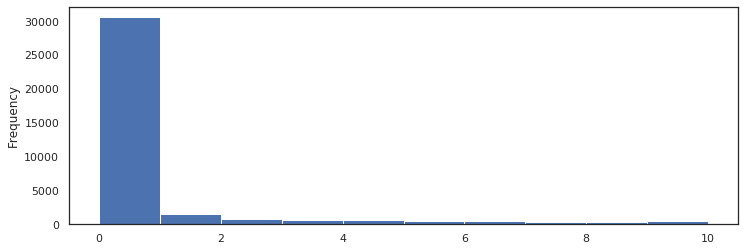

In [63]:
orders['visit_order_max'].plot(kind='hist', bins=10, range=(0, 10), figsize=(12,4))

<div class="alert alert-info">
<b>БОльшая часть покупателей делают свой первый заказ в день первого посещения сервиса "Яндекс Афиша"  </b> 
    

    
</div>

<div class="alert alert-info">
<b></b>

50% покупателей делают покупку в первые 28 минут нахождения на сайте.
    
25% покупателей делают покупку в первые 6 минут нахождения на сайте.
    
15022 посетителей делают покупки не ранее суток с момента первого посещения сайта,
от всех покупателей это составляет 33%.
    
    

</div>

### Среднее кол-во покупок на 1 покупателя за 6 месяцев

In [64]:
orders.head()

buy_ts  revenue                   uid   first_start_order  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

    first_start_visit  visit_order_max  
0 2017-06-01 00:09:00                0  
1 2017-06-01 00:14:00                0  
2 2017-06-01 00:25:00                0  
3 2017-06-01 00:14:00                0  
4 2017-06-01 07:31:00                0

In [65]:
orders['buy_ts_month'] = orders['buy_ts'].astype('datetime64[M]')
orders['first_order_month'] = orders['first_start_order'].astype('datetime64[M]')

orders['cohort_lifetime'] = ((
    orders['buy_ts_month']
    - orders['first_order_month']
) / np.timedelta64(1, 'M')).round().astype('int')

orders.head()

buy_ts  revenue                   uid   first_start_order  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

    first_start_visit  visit_order_max buy_ts_month first_order_month  \
0 2017-06-01 00:09:00                0   2017-06-01        2017-06-01   
1 2017-06-01 00:14:00                0   2017-06-01        2017-06-01   
2 2017-06-01 00:25:00                0   2017-06-01        2017-06-01   
3 2017-06-01 00:14:00                0   2017-06-01        2017-06-01   
4 2017-06-01 07:31:00                0   2017-06-01        2017-06-01   

   cohort_lifetime  
0                0  
1                0  
2                0  
3                0  
4                0

In [66]:
cohorts_orders = orders.groupby(['first_order_month','cohort_lifetime']).agg({'uid':'nunique', 'buy_ts':'count'}).reset_index()
cohorts_orders = cohorts_orders.rename(columns=
                   {
                       'buy_ts': 'buy_count',
                       'uid': 'uid_nunique',
                   }
                  )
cohorts_orders['orders_per_user']=cohorts_orders['buy_count']/cohorts_orders['uid_nunique']
cohorts_orders

first_order_month  cohort_lifetime  uid_nunique  buy_count  orders_per_user
0         2017-06-01                0         1803       2033         1.127565
1         2017-06-01                1           53        143         2.698113
2         2017-06-01                2           44        138         3.136364
3         2017-06-01                3           43        141         3.279070
4         2017-06-01                4           73        181         2.479452
..               ...              ...          ...        ...              ...
73        2018-03-01                1           82        170         2.073171
74        2018-03-01                2           55        173         3.145455
75        2018-04-01                0         2111       2299         1.089057
76        2018-04-01                1           63        188         2.984127
77        2018-05-01                0         2757       2978         1.080160

[78 rows x 5 columns]

In [67]:
cohorts_orders_pivot=cohorts_orders.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='orders_per_user',
    aggfunc='mean',
) 
cohorts_orders_pivot

cohort_lifetime          0         1         2         3         4         5   \
first_order_month                                                               
2017-06-01         1.127565  2.698113  3.136364  3.279070  2.479452  2.568966   
2017-07-01         1.125874  1.957447  2.188679  1.655738  1.468085  2.194444   
2017-08-01         1.106688  1.877193  1.959184  1.900000  2.184211  2.000000   
2017-09-01         1.127848  1.675000  1.609195  2.257143  1.291667  1.733333   
2017-10-01         1.129756  1.393617  1.348624  1.337349  1.382022  1.424242   
2017-11-01         1.172622  1.805825  1.539823  2.040000  1.729730  1.239130   
2017-12-01         1.145066  1.869565  2.076923  1.873563  1.733333  1.637931   
2018-01-01         1.110720  2.000000  2.000000  1.538462  1.785714       NaN   
2018-02-01         1.116320  1.908257  1.462963  1.805556       NaN       NaN   
2018-03-01         1.155500  2.073171  3.145455       NaN       NaN       NaN   
2018-04-01         1.089057  2.984127       NaN       NaN       NaN       NaN   
2018-05-01         1.080160       NaN       NaN       NaN       NaN       NaN   

cohort_lifetime          6         7         8         9         10        11  
first_order_month                                                              
2017-06-01         3.452830  2.575000  2.653061  2.743590  1.769231  1.630435  
2017-07-01         1.735294  1.228571  1.384615  1.095238  2.227273       NaN  
2017-08-01         1.703704  1.850000  2.500000  1.500000       NaN       NaN  
2017-09-01         1.677419  1.513514  1.435897       NaN       NaN       NaN  
2017-10-01         1.576923  1.935484       NaN       NaN       NaN       NaN  
2017-11-01         1.644068       NaN       NaN       NaN       NaN       NaN  
2017-12-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-01-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-02-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-03-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-04-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-05-01              NaN       NaN       NaN       NaN       NaN       NaN

In [68]:
cohorts_orders_pivot.cumsum(axis=1)

cohort_lifetime          0         1         2          3          4   \
first_order_month                                                       
2017-06-01         1.127565  3.825678  6.962042  10.241112  12.720564   
2017-07-01         1.125874  3.083321  5.272000   6.927738   8.395823   
2017-08-01         1.106688  2.983881  4.943065   6.843065   9.027275   
2017-09-01         1.127848  2.802848  4.412044   6.669186   7.960853   
2017-10-01         1.129756  2.523373  3.871996   5.209346   6.591368   
2017-11-01         1.172622  2.978447  4.518270   6.558270   8.288000   
2017-12-01         1.145066  3.014631  5.091555   6.965118   8.698451   
2018-01-01         1.110720  3.110720  5.110720   6.649182   8.434896   
2018-02-01         1.116320  3.024577  4.487540   6.293096        NaN   
2018-03-01         1.155500  3.228671  6.374125        NaN        NaN   
2018-04-01         1.089057  4.073184       NaN        NaN        NaN   
2018-05-01         1.080160       NaN       NaN        NaN        NaN   

cohort_lifetime           5          6          7          8          9   \
first_order_month                                                          
2017-06-01         15.289529  18.742360  21.317360  23.970421  26.714011   
2017-07-01         10.590267  12.325562  13.554133  14.938748  16.033986   
2017-08-01         11.027275  12.730979  14.580979  17.080979  18.580979   
2017-09-01          9.694186  11.371606  12.885119  14.321017        NaN   
2017-10-01          8.015611   9.592534  11.528018        NaN        NaN   
2017-11-01          9.527131  11.171198        NaN        NaN        NaN   
2017-12-01         10.336382        NaN        NaN        NaN        NaN   
2018-01-01               NaN        NaN        NaN        NaN        NaN   
2018-02-01               NaN        NaN        NaN        NaN        NaN   
2018-03-01               NaN        NaN        NaN        NaN        NaN   
2018-04-01               NaN        NaN        NaN        NaN        NaN   
2018-05-01               NaN        NaN        NaN        NaN        NaN   

cohort_lifetime           10         11  
first_order_month                        
2017-06-01         28.483241  30.113676  
2017-07-01         18.261259        NaN  
2017-08-01               NaN        NaN  
2017-09-01               NaN        NaN  
2017-10-01               NaN        NaN  
2017-11-01               NaN        NaN  
2017-12-01               NaN        NaN  
2018-01-01               NaN        NaN  
2018-02-01               NaN        NaN  
2018-03-01               NaN        NaN  
2018-04-01               NaN        NaN  
2018-05-01               NaN        NaN

In [69]:
(cohorts_orders_pivot.cumsum(axis=1)[5]/36).sum()
#разделим на 36, т.к. 6 месяцев и 6 когорт рассматриваем, 
#таким образом найдем среднее кол-во покупок на 1 пользователя за 6 месяцев

2.068899493034032

<div class="alert alert-info">
<b>Среднее кол-во покупок на одного покупателя за 6 месяцев около 2</b>


</div>

### Средний чек

In [70]:
orders.head()

buy_ts  revenue                   uid   first_start_order  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

    first_start_visit  visit_order_max buy_ts_month first_order_month  \
0 2017-06-01 00:09:00                0   2017-06-01        2017-06-01   
1 2017-06-01 00:14:00                0   2017-06-01        2017-06-01   
2 2017-06-01 00:25:00                0   2017-06-01        2017-06-01   
3 2017-06-01 00:14:00                0   2017-06-01        2017-06-01   
4 2017-06-01 07:31:00                0   2017-06-01        2017-06-01   

   cohort_lifetime  
0                0  
1                0  
2                0  
3                0  
4                0

In [71]:
average_check=orders.groupby(
    ['buy_ts_month']
).agg({'revenue': 'sum', 'uid': 'count'}).reset_index()
average_check['average_check']=average_check['revenue']/average_check['uid']
average_check

buy_ts_month   revenue   uid  average_check
0    2017-06-01   8419.96  2033       4.141643
1    2017-07-01  11350.10  2075       5.469928
2    2017-08-01   7738.98  1620       4.777148
3    2017-09-01  16125.00  3037       5.309516
4    2017-10-01  25192.39  5063       4.975783
5    2017-11-01  24597.77  5159       4.767934
6    2017-12-01  34263.93  5687       6.024957
7    2018-01-01  17757.91  4298       4.131668
8    2018-02-01  23814.02  4819       4.941693
9    2018-03-01  26639.62  4790       5.561507
10   2018-04-01  15791.31  3018       5.232376
11   2018-05-01  19289.93  4013       4.806860

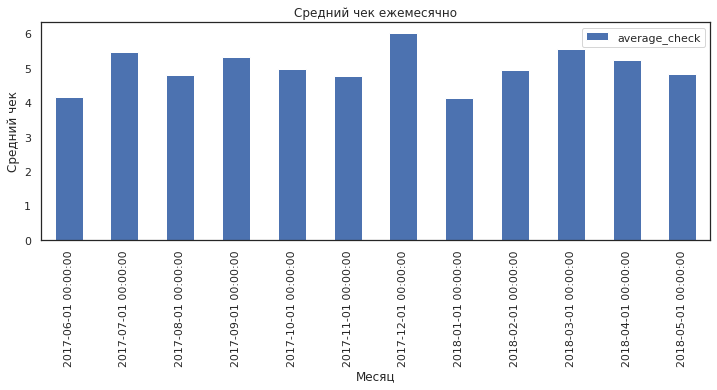

In [72]:
average_check.groupby(
    ['buy_ts_month']
).agg({'average_check': 'sum'}).plot(kind='bar', figsize=(12,4)).set_title('Средний чек ежемесячно') 
plt.xlabel('Месяц') 
plt.ylabel('Средний чек'); 
plt.show()

<div class="alert alert-info">
<b></b>
Самый маленький чек в январе 2018 года,
большой - декабрь 2017г.  

</div>

<div class="alert alert-info">
<b>Посмотрим средний чек по когортам</b>


</div>

In [73]:
orders_grouped_cohorts_revenue = orders.groupby(
    ['first_order_month', 'cohort_lifetime']
).agg({'revenue': 'sum', 'uid': 'count'}).reset_index()
orders_grouped_cohorts_revenue.head()
#nunique

first_order_month  cohort_lifetime  revenue   uid
0        2017-06-01                0  8419.96  2033
1        2017-06-01                1   813.72   143
2        2017-06-01                2   752.12   138
3        2017-06-01                3  1399.98   141
4        2017-06-01                4  1357.19   181

In [74]:
orders_grouped_cohorts_revenue['revenue_per_user'] = (
    orders_grouped_cohorts_revenue['revenue']
    / orders_grouped_cohorts_revenue['uid']
) 
orders_grouped_cohorts_revenue.head()

first_order_month  cohort_lifetime  revenue   uid  revenue_per_user
0        2017-06-01                0  8419.96  2033          4.141643
1        2017-06-01                1   813.72   143          5.690350
2        2017-06-01                2   752.12   138          5.450145
3        2017-06-01                3  1399.98   141          9.928936
4        2017-06-01                4  1357.19   181          7.498287

<div class="alert alert-info">
<b></b>
Оценим, как изменяется средний чек в зависимости от времени, прошедшего с момента первой покупки.


</div>


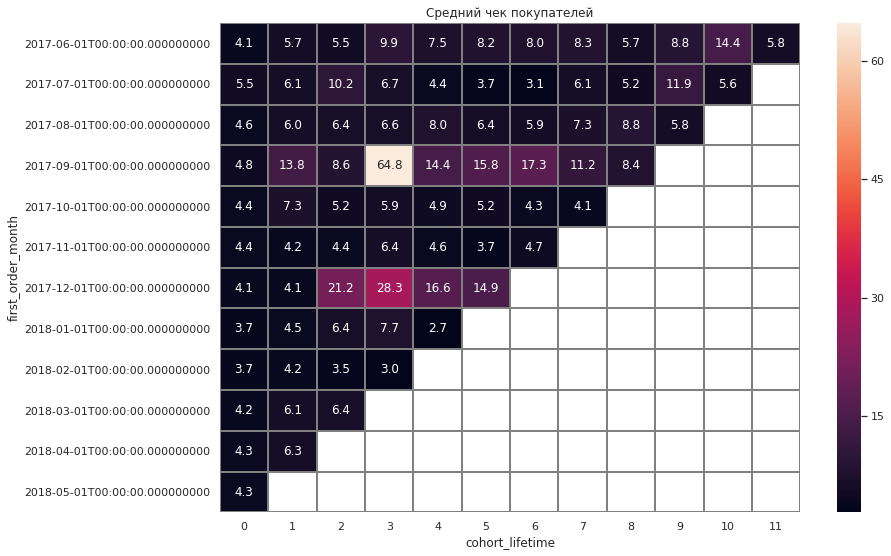

In [75]:
orders_grouped_cohorts_revenue_pivot=orders_grouped_cohorts_revenue.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='revenue_per_user',
    aggfunc='mean',
) 

plt.figure(figsize=(13, 9))
plt.title('Средний чек покупателей')
sns.heatmap(orders_grouped_cohorts_revenue_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray') 


<div class="alert alert-info">
<b> </b>

    
В июне, сентябре и декабре 2017 пришли самые платежеспособные покупатели.
    
Средний чек растет у каждой когорты, значит в целом покупатели становятся лояльнее к продукту.

</div>

In [76]:
average_check['average_check'].mean()

5.0117511043975576

<div class="alert alert-info">
<b> </b>

    
Средний чек по всем когортам за весь период - 5.

</div>

### LTV

<div class="alert alert-info">
<b> </b>
    LTV удобно считать по когортам. Для этого нужно:
    
1.	найти дату первой покупки каждого покупателя;
    
2.	вычислить число новых покупателей за каждую дату;
    
3.	добавить дату первой покупки в таблицу с заказами;
    
4.	сгруппировать таблицу и посчитать выручку.

</div>

In [77]:
costs.head()

source_id   costs_ts  costs      month
0          1 2017-06-01  75.20 2017-06-01
1          1 2017-06-02  62.25 2017-06-01
2          1 2017-06-03  36.53 2017-06-01
3          1 2017-06-04  55.00 2017-06-01
4          1 2017-06-05  57.08 2017-06-01

In [78]:
orders.head()

buy_ts  revenue                   uid   first_start_order  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

    first_start_visit  visit_order_max buy_ts_month first_order_month  \
0 2017-06-01 00:09:00                0   2017-06-01        2017-06-01   
1 2017-06-01 00:14:00                0   2017-06-01        2017-06-01   
2 2017-06-01 00:25:00                0   2017-06-01        2017-06-01   
3 2017-06-01 00:14:00                0   2017-06-01        2017-06-01   
4 2017-06-01 07:31:00                0   2017-06-01        2017-06-01   

   cohort_lifetime  
0                0  
1                0  
2                0  
3                0  
4                0

In [79]:
#Посчитаем количество новых покупателей (n_buyers) за каждый месяц

cohort_sizes = (
    orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']
print(cohort_sizes)


   first_order_month  n_buyers
0         2017-06-01      1803
1         2017-07-01      1716
2         2017-08-01      1256
3         2017-09-01      2370
4         2017-10-01      3969
5         2017-11-01      3806
6         2017-12-01      4074
7         2018-01-01      3125
8         2018-02-01      3370
9         2018-03-01      3209
10        2018-04-01      2111
11        2018-05-01      2757


In [80]:
#Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку

cohorts = (
    orders.groupby(['first_order_month', 'cohort_lifetime'])
    .agg({'revenue': 'sum'})
    .reset_index()
)

cohorts.head()

first_order_month  cohort_lifetime  revenue
0        2017-06-01                0  8419.96
1        2017-06-01                1   813.72
2        2017-06-01                2   752.12
3        2017-06-01                3  1399.98
4        2017-06-01                4  1357.19

In [81]:
#С точки зрения когортного анализа LTV — накопительная выручка когорты в пересчёте на количество людей. 
#Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц

ltv = pd.merge(cohort_sizes, cohorts, on='first_order_month')
ltv.head()

first_order_month  n_buyers  cohort_lifetime  revenue
0        2017-06-01      1803                0  8419.96
1        2017-06-01      1803                1   813.72
2        2017-06-01      1803                2   752.12
3        2017-06-01      1803                3  1399.98
4        2017-06-01      1803                4  1357.19

In [82]:
#LTV считают из валовой прибыли, а т.к маржинальность 100%, значит валовая прибыль равна выручке. 
#LTV — относительный показатель. Его удобнее смотреть по «возрастным» когортам.

ltv['ltv'] = ltv['revenue'] / ltv['n_buyers']
ltv.head()

first_order_month  n_buyers  cohort_lifetime  revenue       ltv
0        2017-06-01      1803                0  8419.96  4.669972
1        2017-06-01      1803                1   813.72  0.451314
2        2017-06-01      1803                2   752.12  0.417149
3        2017-06-01      1803                3  1399.98  0.776473
4        2017-06-01      1803                4  1357.19  0.752740

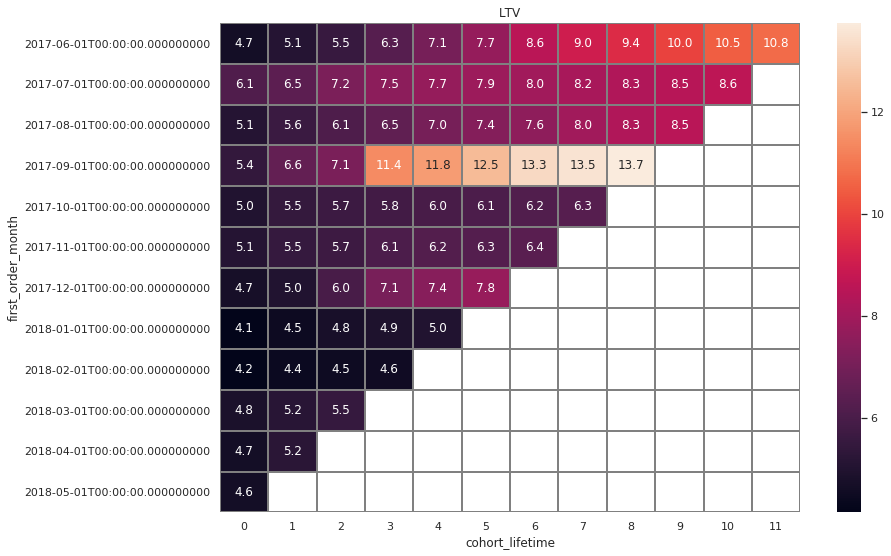

In [83]:
ltv_pivot = ltv.pivot_table(
    index='first_order_month', columns='cohort_lifetime', values='ltv', aggfunc='mean'
)

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(ltv_pivot.cumsum(axis=1), annot=True, fmt='.1f', linewidths=1, linecolor='gray'); 

In [84]:
ltv_pivot=ltv_pivot.cumsum(axis=1)
ltv_pivot

cohort_lifetime          0         1         2          3          4   \
first_order_month                                                       
2017-06-01         4.669972  5.121287  5.538436   6.314908   7.067648   
2017-07-01         6.140082  6.464907  7.153240   7.548403   7.727296   
2017-08-01         5.118997  5.631576  6.120772   6.518997   7.049825   
2017-09-01         5.443055  6.617274  7.127831  11.449743  11.825443   
2017-10-01         4.978526  5.463658  5.657347   5.821083   5.973878   
2017-11-01         5.107853  5.517901  5.720820   6.061703   6.216109   
2017-12-01         4.730736  4.989057  5.973044   7.104998   7.422312   
2018-01-01         4.148986  4.463792  4.772531   4.920912   4.986710   
2018-02-01         4.152932  4.411424  4.494166   4.551988        NaN   
2018-03-01         4.844011  5.168810  5.513238        NaN        NaN   
2018-04-01         4.669834  5.230194       NaN        NaN        NaN   
2018-05-01         4.644255       NaN       NaN        NaN        NaN   

cohort_lifetime           5          6          7          8         9   \
first_order_month                                                         
2017-06-01          7.741314   8.552146   9.029052   9.440488  9.964221   
2017-07-01          7.896259   8.004149   8.157244   8.322086  8.481958   
2017-08-01          7.354236   7.569713   8.001839   8.317325  8.511664   
2017-09-01         12.520422  13.279574  13.544371  13.742755       NaN   
2017-10-01          6.097564   6.187385   6.311522        NaN       NaN   
2017-11-01          6.271151   6.392152        NaN        NaN       NaN   
2017-12-01          7.770734        NaN        NaN        NaN       NaN   
2018-01-01               NaN        NaN        NaN        NaN       NaN   
2018-02-01               NaN        NaN        NaN        NaN       NaN   
2018-03-01               NaN        NaN        NaN        NaN       NaN   
2018-04-01               NaN        NaN        NaN        NaN       NaN   
2018-05-01               NaN        NaN        NaN        NaN       NaN   

cohort_lifetime           10         11  
first_order_month                        
2017-06-01         10.514187  10.754803  
2017-07-01          8.642949        NaN  
2017-08-01               NaN        NaN  
2017-09-01               NaN        NaN  
2017-10-01               NaN        NaN  
2017-11-01               NaN        NaN  
2017-12-01               NaN        NaN  
2018-01-01               NaN        NaN  
2018-02-01               NaN        NaN  
2018-03-01               NaN        NaN  
2018-04-01               NaN        NaN  
2018-05-01               NaN        NaN

In [85]:
ltv_pivot[5]

first_order_month
2017-06-01     7.741314
2017-07-01     7.896259
2017-08-01     7.354236
2017-09-01    12.520422
2017-10-01     6.097564
2017-11-01     6.271151
2017-12-01     7.770734
2018-01-01          NaN
2018-02-01          NaN
2018-03-01          NaN
2018-04-01          NaN
2018-05-01          NaN
Name: 5, dtype: float64

In [86]:
ltv_pivot[5].mean()

7.950239883118343

<div class="alert alert-info">
<b>Средний LTV по когортам за 6 месяцев = 7,9</b>
</div>

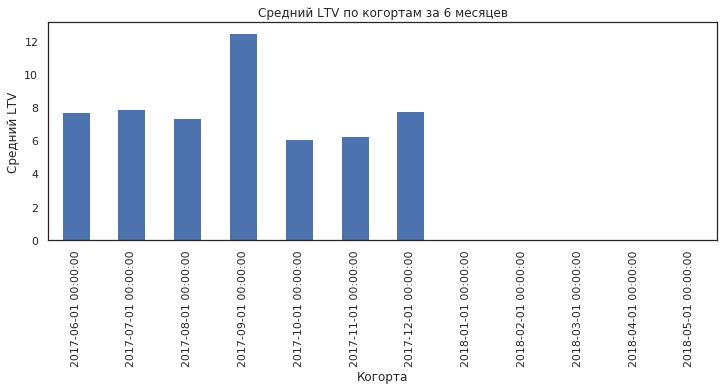

In [87]:
ltv_pivot[5].plot(kind='bar', figsize=(12,4)).set_title('Средний LTV по когортам за 6 месяцев') 
plt.xlabel('Когорта') 
plt.ylabel('Средний LTV'); 
plt.show()

<div class="alert alert-info">
<b>Самые ценные клиенты оказались в сентябрьской когорте, т.к. принесли в среднем со всех своих покупок больше денег</b>
</div>

## Маркетинговые метрики

### Общая сумма расходов на маркетинг

In [88]:
costs.head()

source_id   costs_ts  costs      month
0          1 2017-06-01  75.20 2017-06-01
1          1 2017-06-02  62.25 2017-06-01
2          1 2017-06-03  36.53 2017-06-01
3          1 2017-06-04  55.00 2017-06-01
4          1 2017-06-05  57.08 2017-06-01

In [89]:
costs.groupby(
    ['source_id']
).agg({'costs': 'sum'}).sum()

costs    329131.62
dtype: float64

<div class="alert alert-info">
<b>Суммарные расходы за весь период и по всем источникам - 329 131,62</b>

Ниже рассчитаны расходы по источникам и расходы по источник/месяц.
    
</div>

In [90]:
costs_gr=costs.groupby(
    ['source_id']
).agg({'costs': 'sum'})
costs_gr.sort_values(by = 'costs', ascending = False) 

costs
source_id           
3          141321.63
4           61073.60
5           51757.10
2           42806.04
1           20833.27
10           5822.49
9            5517.49

<div class="alert alert-info">
<b>Львиная доля расходов приходится на трафик № 3</b>
</div>

In [91]:
costs_pivot=costs.pivot_table(
    index='source_id',
    columns='month',
    values='costs',
    aggfunc='sum',
) 
costs_pivot

month      2017-06-01  2017-07-01  2017-08-01  2017-09-01  2017-10-01  \
source_id                                                               
1             1125.61     1072.88      951.81     1502.01     2315.75   
2             2427.38     2333.11     1811.05     2985.66     4845.00   
3             7731.65     7674.37     6143.54     9963.55    15737.24   
4             3514.80     3529.73     3217.36     5192.26     6420.84   
5             2616.12     2998.14     2185.28     3849.14     5767.40   
9              285.22      302.54      248.93      415.62      609.41   
10             314.22      329.82      232.57      460.67      627.24   

month      2017-11-01  2017-12-01  2018-01-01  2018-02-01  2018-03-01  \
source_id                                                               
1             2445.16     2341.20     2186.18     2204.48     1893.09   
2             5247.68     4897.80     4157.74     4474.34     3943.14   
3            17025.34    16219.52    14808.78    14228.56    13080.85   
4             5388.82     7680.47     5832.79     5711.96     5961.87   
5             6325.34     5872.52     5371.52     5071.31     4529.62   
9              683.18      657.98      547.16      551.50      480.29   
10             792.36      645.86      614.35      480.88      526.41   

month      2018-04-01  2018-05-01  
source_id                          
1             1327.49     1467.61  
2             2993.70     2689.44  
3             9296.81     9411.42  
4             4408.49     4214.21  
5             3501.15     3669.56  
9              373.49      362.17  
10             388.25      409.86

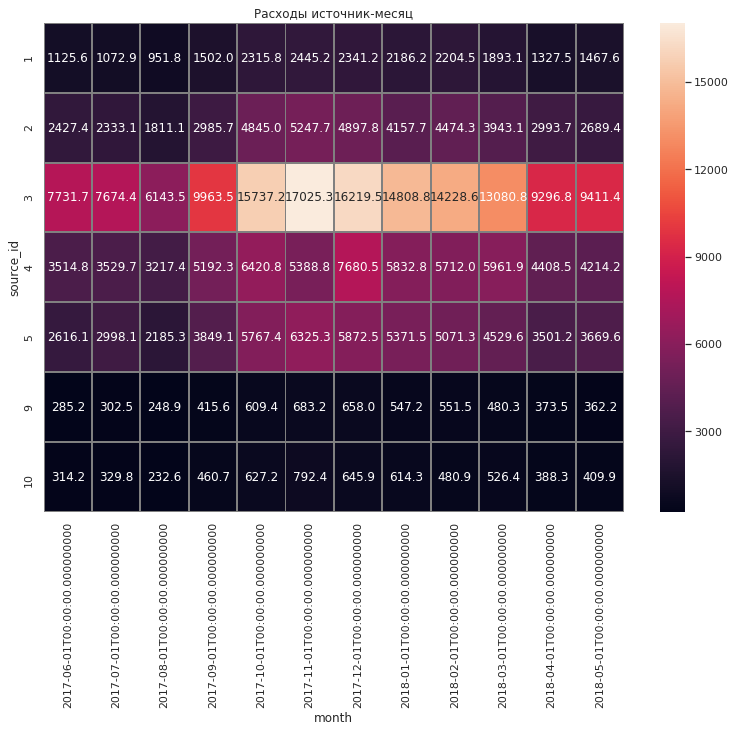

In [92]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Расходы источник-месяц')
sns.heatmap(costs_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray'); 

<div class="alert alert-info">
<b></b>
Расходы увеличиваются осенью-зимой, особенно по 2-5 трафикам.   
</div>

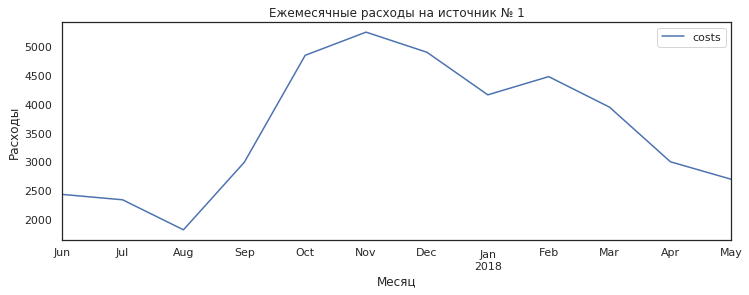

In [93]:
costs.query('source_id ==2').groupby(['month']).agg({'costs': 'sum'}).plot(kind='line', figsize=(12,4)).set_title('Ежемесячные расходы на источник № 1')
plt.xlabel("Месяц") 
plt.ylabel("Расходы");

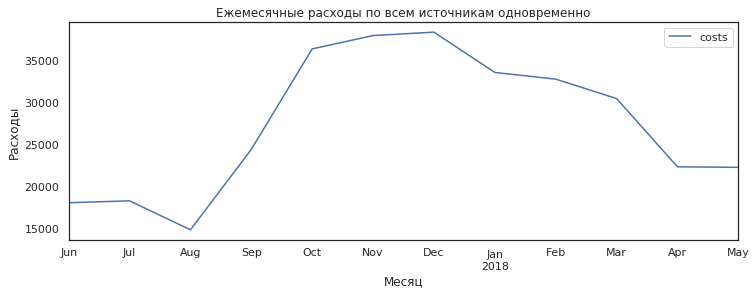

In [94]:
costs.groupby(['month']).agg({'costs': 'sum'}).plot(kind='line', figsize=(12,4)).set_title(
    'Ежемесячные расходы по всем источникам одновременно'
)
plt.xlabel("Месяц") 
plt.ylabel("Расходы");

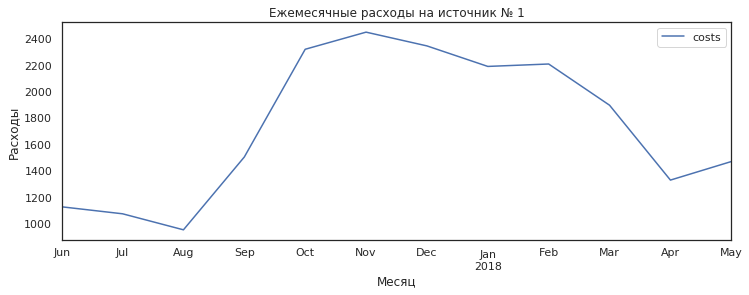

In [95]:
costs.query('source_id == 1').groupby(['month']).agg({'costs': 'sum'}).plot(kind='line', figsize=(12,4)).set_title('Ежемесячные расходы на источник № 1')
plt.xlabel("Месяц") 
plt.ylabel("Расходы");

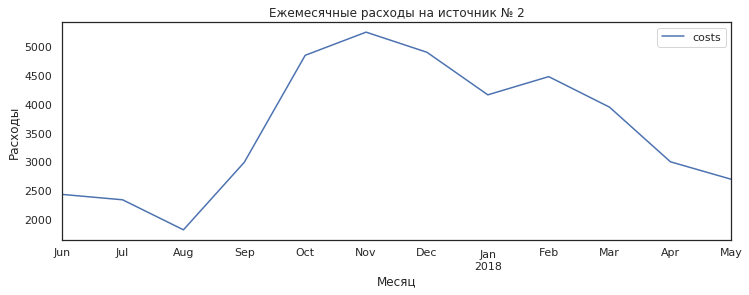

In [96]:
costs.query('source_id ==2').groupby(['month']).agg({'costs': 'sum'}).plot(kind='line', figsize=(12,4)).set_title('Ежемесячные расходы на источник № 2')
plt.xlabel("Месяц") 
plt.ylabel("Расходы");

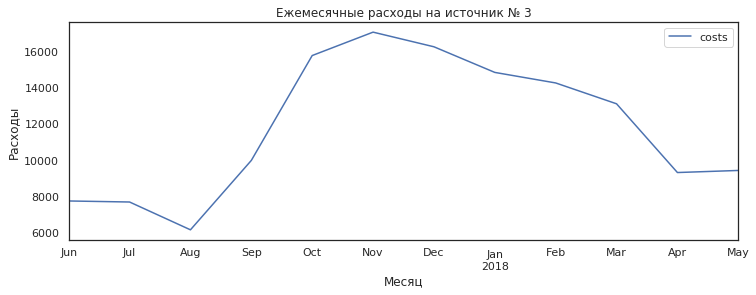

In [97]:
costs.query('source_id ==3').groupby(['month']).agg({'costs': 'sum'}).plot(kind='line', figsize=(12,4)).set_title('Ежемесячные расходы на источник № 3')
plt.xlabel("Месяц") 
plt.ylabel("Расходы");

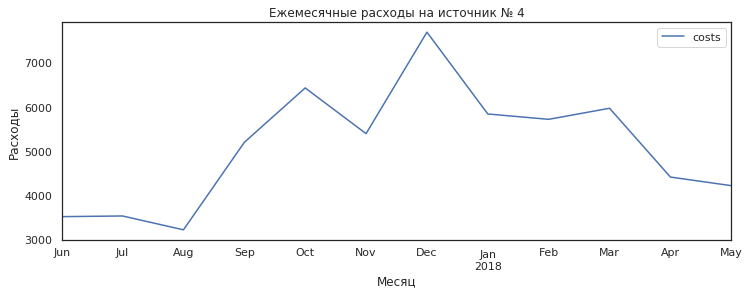

In [98]:
costs.query('source_id ==4').groupby(['month']).agg({'costs': 'sum'}).plot(kind='line', figsize=(12,4)).set_title('Ежемесячные расходы на источник № 4')
plt.xlabel("Месяц") 
plt.ylabel("Расходы");

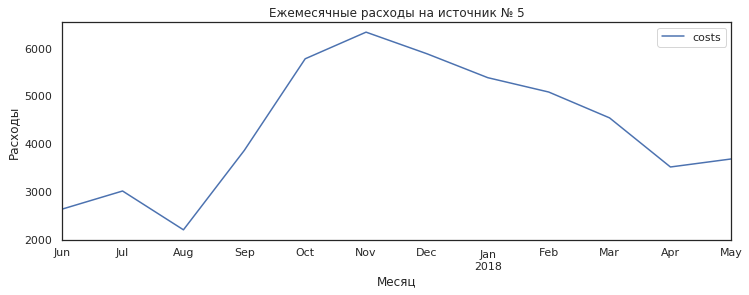

In [99]:
costs.query('source_id ==5').groupby(['month']).agg({'costs': 'sum'}).plot(kind='line', figsize=(12,4)).set_title('Ежемесячные расходы на источник № 5')
plt.xlabel("Месяц") 
plt.ylabel("Расходы");

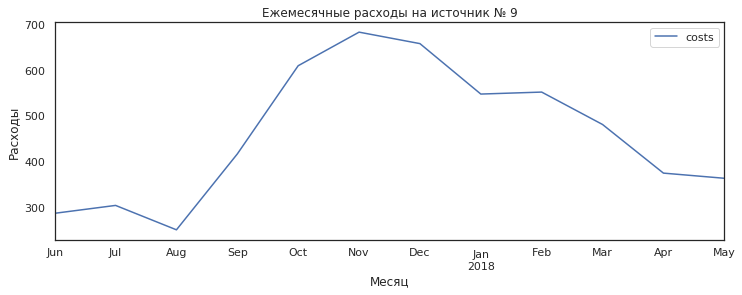

In [100]:
costs.query('source_id ==9').groupby(['month']).agg({'costs': 'sum'}).plot(kind='line', figsize=(12,4)).set_title('Ежемесячные расходы на источник № 9')
plt.xlabel("Месяц") 
plt.ylabel("Расходы");

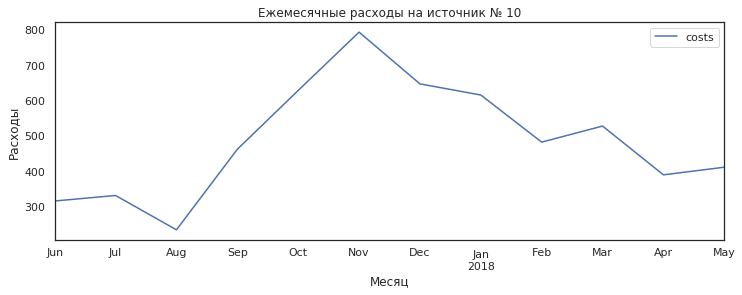

In [101]:
costs.query('source_id ==10').groupby(['month']).agg({'costs': 'sum'}).plot(kind='line', figsize=(12,4)).set_title('Ежемесячные расходы на источник № 10')
plt.xlabel("Месяц") 
plt.ylabel("Расходы");

<div class="alert alert-info">
<b></b>
Расходы по всем источникам увеличиваются осенью, пика достигают в ноябре, далее идет плавное снижение, исключением является 4 трафик, где в ноябре идет снижение и далее резкие подъемы и спады.   
    
Расходы на 4 источник не соответствуют тенденция суммарных расходов.
</div>

### Средний САС на одного покупателя

#### По месяцам

In [102]:
costs.head()

source_id   costs_ts  costs      month
0          1 2017-06-01  75.20 2017-06-01
1          1 2017-06-02  62.25 2017-06-01
2          1 2017-06-03  36.53 2017-06-01
3          1 2017-06-04  55.00 2017-06-01
4          1 2017-06-05  57.08 2017-06-01

In [103]:
costs_month=costs.groupby(
    ['month']
).agg({'costs': 'sum'}).reset_index()
costs_month

month     costs
0  2017-06-01  18015.00
1  2017-07-01  18240.59
2  2017-08-01  14790.54
3  2017-09-01  24368.91
4  2017-10-01  36322.88
5  2017-11-01  37907.88
6  2017-12-01  38315.35
7  2018-01-01  33518.52
8  2018-02-01  32723.03
9  2018-03-01  30415.27
10 2018-04-01  22289.38
11 2018-05-01  22224.27

In [104]:
orders.head()

buy_ts  revenue                   uid   first_start_order  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

    first_start_visit  visit_order_max buy_ts_month first_order_month  \
0 2017-06-01 00:09:00                0   2017-06-01        2017-06-01   
1 2017-06-01 00:14:00                0   2017-06-01        2017-06-01   
2 2017-06-01 00:25:00                0   2017-06-01        2017-06-01   
3 2017-06-01 00:14:00                0   2017-06-01        2017-06-01   
4 2017-06-01 07:31:00                0   2017-06-01        2017-06-01   

   cohort_lifetime  
0                0  
1                0  
2                0  
3                0  
4                0

In [105]:
orders_month=orders.groupby(
    ['first_order_month']
).agg({'uid': 'nunique'}).reset_index()

orders_month = orders_month.rename(columns=
                   {
                       'first_order_month': 'month',
                       'uid': 'count_uid',
                   }
                  )

orders_month

month  count_uid
0  2017-06-01       1803
1  2017-07-01       1716
2  2017-08-01       1256
3  2017-09-01       2370
4  2017-10-01       3969
5  2017-11-01       3806
6  2017-12-01       4074
7  2018-01-01       3125
8  2018-02-01       3370
9  2018-03-01       3209
10 2018-04-01       2111
11 2018-05-01       2757

In [106]:
orders_costs_month = pd.merge(costs_month, orders_month, on='month')
orders_costs_month

month     costs  count_uid
0  2017-06-01  18015.00       1803
1  2017-07-01  18240.59       1716
2  2017-08-01  14790.54       1256
3  2017-09-01  24368.91       2370
4  2017-10-01  36322.88       3969
5  2017-11-01  37907.88       3806
6  2017-12-01  38315.35       4074
7  2018-01-01  33518.52       3125
8  2018-02-01  32723.03       3370
9  2018-03-01  30415.27       3209
10 2018-04-01  22289.38       2111
11 2018-05-01  22224.27       2757

In [107]:
orders_costs_month['cost_uid']=orders_costs_month['costs']/orders_costs_month['count_uid']
orders_costs_month

month     costs  count_uid   cost_uid
0  2017-06-01  18015.00       1803   9.991681
1  2017-07-01  18240.59       1716  10.629714
2  2017-08-01  14790.54       1256  11.775908
3  2017-09-01  24368.91       2370  10.282241
4  2017-10-01  36322.88       3969   9.151645
5  2017-11-01  37907.88       3806   9.960032
6  2017-12-01  38315.35       4074   9.404848
7  2018-01-01  33518.52       3125  10.725926
8  2018-02-01  32723.03       3370   9.710098
9  2018-03-01  30415.27       3209   9.478115
10 2018-04-01  22289.38       2111  10.558683
11 2018-05-01  22224.27       2757   8.061034

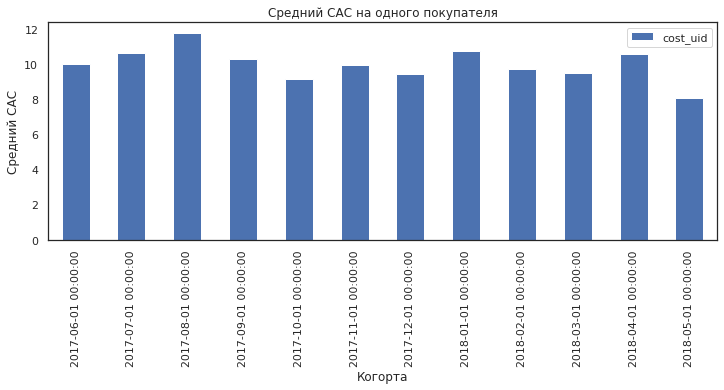

In [108]:
orders_costs_month.groupby(
    ['month']
).agg({'cost_uid': 'sum'}).plot(kind='bar', figsize=(12,4)).set_title('Средний САС на одного покупателя') 
plt.xlabel('Когорта') 
plt.ylabel('Средний САС'); 
plt.show()

<div class="alert alert-info">
<b>Дороже всего обошлись августовские покупатели, а дешевле -майские.</b>
</div>

In [109]:
orders_costs_month.groupby(
    ['month']
).agg({'cost_uid': 'sum'}).mean()

cost_uid    9.977494
dtype: float64

<div class="alert alert-info">
<b>Средний САС = 10.</b>
</div>

#### Месяц-источник

In [110]:
costs_month_source=costs.groupby(
    ['month','source_id']
).agg({'costs': 'sum'}).reset_index()
print(costs_month_source.shape)
costs_month_source

(84, 3)


month  source_id    costs
0  2017-06-01          1  1125.61
1  2017-06-01          2  2427.38
2  2017-06-01          3  7731.65
3  2017-06-01          4  3514.80
4  2017-06-01          5  2616.12
..        ...        ...      ...
79 2018-05-01          3  9411.42
80 2018-05-01          4  4214.21
81 2018-05-01          5  3669.56
82 2018-05-01          9   362.17
83 2018-05-01         10   409.86

[84 rows x 3 columns]

In [111]:
visit.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
5  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
6  desktop 2018-01-30 12:09:00          1 2018-01-30 11:13:00   

                    uid  start_month  start_week start_date  long_dt  \
0  16879256277535980062           12          51 2017-12-20 00:18:00   
1    104060357244891740            2           8 2018-02-19 00:28:00   
3  16174680259334210214            5          20 2018-05-20 00:24:00   
5  16007536194108375387            9          35 2017-09-03 00:01:00   
6   6661610529277171451            1           5 2018-01-30 00:56:00   

  first_activity_date start_date_month first_date_month  cohort_lifetime  
0          2017-12-20       2017-12-01       2017-12-01                0  
1          2018-02-19       2018-02-01       2018-02-01                0  
3          2018-03-09       2018-05-01       2018-03-01                2  
5          2017-09-03       2017-09-01       2017-09-01                0  
6          2017-06-29       2018-01-01       2017-06-01                7

In [112]:
#выберем только нужные столбцы из таблицы
visit_1=visit[['uid', 'source_id', 'start_ts']]
print(visit_1.shape)
visit_1.head()

(323564, 3)


uid  source_id            start_ts
0  16879256277535980062          4 2017-12-20 17:20:00
1    104060357244891740          2 2018-02-19 16:53:00
3  16174680259334210214          9 2018-05-20 10:59:00
5  16007536194108375387          5 2017-09-03 21:35:00
6   6661610529277171451          1 2018-01-30 11:13:00

In [113]:
#найдем с какого источника посетитель впервые зашел на сайт
visit_2=visit_1.groupby(
    ['uid']
).agg({'start_ts': 'min'}).reset_index()
print(visit_2.shape)
visit_2.head()

(207022, 2)


uid            start_ts
0   11863502262781 2018-03-01 17:27:00
1   49537067089222 2018-02-06 15:55:00
2  297729379853735 2017-06-07 18:47:00
3  313578113262317 2017-09-18 22:49:00
4  325320750514679 2017-09-30 14:29:00

In [114]:
#объединим таблицы так, чтобы остались только первоначальные заходы
visit_start= visit_2.merge(visit_1,on=['uid', 'start_ts']) 
print(visit_start.shape)
visit_start.head()

(207022, 3)


uid            start_ts  source_id
0   11863502262781 2018-03-01 17:27:00          3
1   49537067089222 2018-02-06 15:55:00          2
2  297729379853735 2017-06-07 18:47:00          3
3  313578113262317 2017-09-18 22:49:00          2
4  325320750514679 2017-09-30 14:29:00          5

In [115]:
#выделим месяц первого захода
visit_start['start_date_month']=visit_start['start_ts'].astype('datetime64[M]')
visit_start.head()

uid            start_ts  source_id start_date_month
0   11863502262781 2018-03-01 17:27:00          3       2018-03-01
1   49537067089222 2018-02-06 15:55:00          2       2018-02-01
2  297729379853735 2017-06-07 18:47:00          3       2017-06-01
3  313578113262317 2017-09-18 22:49:00          2       2017-09-01
4  325320750514679 2017-09-30 14:29:00          5       2017-09-01

In [116]:
#сгруппируем по месяцу и по источнику, посчитаем кол-во посетителей
visit_month_source=visit_start.groupby(
    ['start_date_month','source_id']
).agg({'uid': 'count'}).reset_index()

visit_month_source = visit_month_source.rename(columns=
                   {
                       'start_date_month': 'month',
                       'uid': 'count_uid',
                   }
                  )
print(visit_month_source.shape)
visit_month_source.head()

(84, 3)


month  source_id  count_uid
0 2017-06-01          1        599
1 2017-06-01          2       1142
2 2017-06-01          3       3637
3 2017-06-01          4       3081
4 2017-06-01          5       2427

In [117]:
#соединим с расходами
visit_costs_month_source = costs_month_source.merge(visit_month_source,on=['month', 'source_id']) 
print(visit_costs_month_source.shape)
visit_costs_month_source.head()

(84, 4)


month  source_id    costs  count_uid
0 2017-06-01          1  1125.61        599
1 2017-06-01          2  2427.38       1142
2 2017-06-01          3  7731.65       3637
3 2017-06-01          4  3514.80       3081
4 2017-06-01          5  2616.12       2427

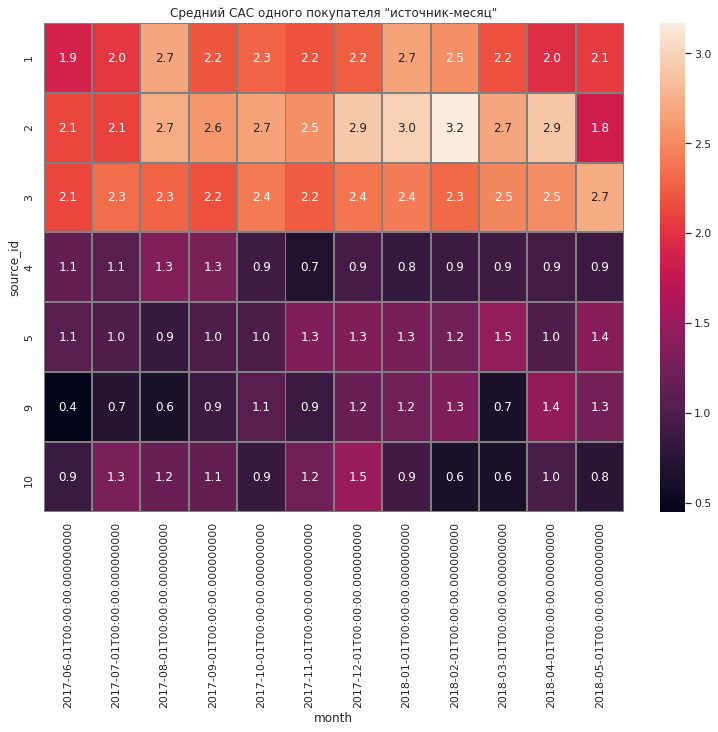

In [118]:
visit_costs_month_source['cost_uid']=visit_costs_month_source['costs']/visit_costs_month_source['count_uid']
visit_costs_month_source_puvot=visit_costs_month_source.pivot_table(
    index='source_id',
    columns='month',
    values='cost_uid',
    aggfunc='sum',
) 

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Средний САС одного покупателя "источник-месяц"')
sns.heatmap(visit_costs_month_source_puvot, annot=True, fmt='.1f', linewidths=1, linecolor='gray'); 

<div class="alert alert-info">
<b>Дороже всего обошлись клиенты, привлеченные через 2 источник в декабре, январе, феврале.</b>
</div>

#### По источникам

In [119]:
visit_costs_month_source.head()

month  source_id    costs  count_uid  cost_uid
0 2017-06-01          1  1125.61        599  1.879149
1 2017-06-01          2  2427.38       1142  2.125552
2 2017-06-01          3  7731.65       3637  2.125832
3 2017-06-01          4  3514.80       3081  1.140798
4 2017-06-01          5  2616.12       2427  1.077923

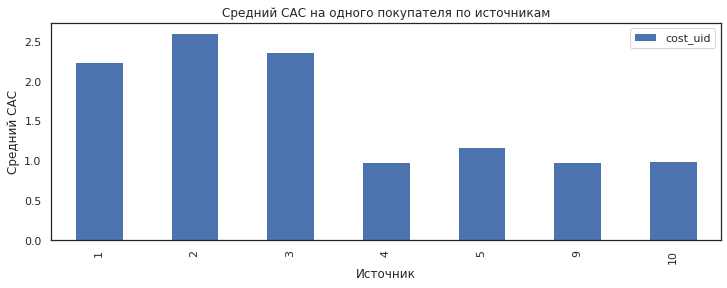

In [120]:
visit_costs_month_source.groupby(
    ['source_id']
).agg({'cost_uid': 'mean'}).plot(kind='bar', figsize=(12,4)).set_title('Средний САС на одного покупателя по источникам') 
plt.xlabel('Источник') 
plt.ylabel('Средний САС'); 
plt.show()


<div class="alert alert-info">
<b>Дороже всего обошлись клиенты привлеченные через 1-3 источники, дешевле - через 4,5,9,10 источники.</b>
</div>

### ROMI

#### Анализ источников

In [121]:
#расходы
print(costs.shape)
costs.head()

(2542, 4)


source_id   costs_ts  costs      month
0          1 2017-06-01  75.20 2017-06-01
1          1 2017-06-02  62.25 2017-06-01
2          1 2017-06-03  36.53 2017-06-01
3          1 2017-06-04  55.00 2017-06-01
4          1 2017-06-05  57.08 2017-06-01

In [122]:
costs_gr=costs.groupby(
    ['source_id']
).agg({'costs': 'sum'}).reset_index()
print(costs_gr.shape)
costs_gr

(7, 2)


source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49

In [123]:
costs_gr_month=costs.groupby(
    ['month']
).agg({'costs': 'sum'}).reset_index()

costs_gr_month

month     costs
0  2017-06-01  18015.00
1  2017-07-01  18240.59
2  2017-08-01  14790.54
3  2017-09-01  24368.91
4  2017-10-01  36322.88
5  2017-11-01  37907.88
6  2017-12-01  38315.35
7  2018-01-01  33518.52
8  2018-02-01  32723.03
9  2018-03-01  30415.27
10 2018-04-01  22289.38
11 2018-05-01  22224.27

In [124]:
#таблица заказов
print(orders.shape)
orders.head()

(45612, 9)


buy_ts  revenue                   uid   first_start_order  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

    first_start_visit  visit_order_max buy_ts_month first_order_month  \
0 2017-06-01 00:09:00                0   2017-06-01        2017-06-01   
1 2017-06-01 00:14:00                0   2017-06-01        2017-06-01   
2 2017-06-01 00:25:00                0   2017-06-01        2017-06-01   
3 2017-06-01 00:14:00                0   2017-06-01        2017-06-01   
4 2017-06-01 07:31:00                0   2017-06-01        2017-06-01   

   cohort_lifetime  
0                0  
1                0  
2                0  
3                0  
4                0

In [125]:
orders_gr=orders.groupby(
    ['first_order_month', 'cohort_lifetime', 'uid']
).agg({'revenue': 'sum'}).reset_index()
print(orders_gr.shape)
orders_gr.head()

(37678, 4)


first_order_month  cohort_lifetime                uid  revenue
0        2017-06-01                0  16233238570251706     1.65
1        2017-06-01                0  29085576454138824     3.36
2        2017-06-01                0  31782048561502182     6.11
3        2017-06-01                0  50884319066603964     0.98
4        2017-06-01                0  63862661827066303    15.88

In [126]:
#таблица содержит месяц и источник первого захода на сайт
print(visit_start.shape)
visit_start.head()

(207022, 4)


uid            start_ts  source_id start_date_month
0   11863502262781 2018-03-01 17:27:00          3       2018-03-01
1   49537067089222 2018-02-06 15:55:00          2       2018-02-01
2  297729379853735 2017-06-07 18:47:00          3       2017-06-01
3  313578113262317 2017-09-18 22:49:00          2       2017-09-01
4  325320750514679 2017-09-30 14:29:00          5       2017-09-01

In [127]:
orders_gr_visit_start = orders_gr.merge(visit_start,on=['uid'])
print(orders_gr_visit_start.shape)
orders_gr_visit_start.head()

(37678, 7)


first_order_month  cohort_lifetime                uid  revenue  \
0        2017-06-01                0  16233238570251706     1.65   
1        2017-06-01                0  29085576454138824     3.36   
2        2017-06-01                0  31782048561502182     6.11   
3        2017-06-01                0  50884319066603964     0.98   
4        2017-06-01                0  63862661827066303    15.88   

             start_ts  source_id start_date_month  
0 2017-06-06 20:16:00          3       2017-06-01  
1 2017-06-08 11:21:00          5       2017-06-01  
2 2017-06-03 11:12:00          3       2017-06-01  
3 2017-06-08 13:14:00          3       2017-06-01  
4 2017-06-14 12:16:00          4       2017-06-01

In [128]:
orders_gr_visit_start['source_id'].value_counts()

3     10700
4     10601
5      6850
2      3862
1      3059
9      1314
10     1292
Name: source_id, dtype: int64

In [129]:
orders_gr_visit_start=orders_gr_visit_start.query('source_id != 7')
orders_gr_visit_start['source_id'].value_counts()

3     10700
4     10601
5      6850
2      3862
1      3059
9      1314
10     1292
Name: source_id, dtype: int64

In [130]:
uid_costs_gr=orders_gr_visit_start.groupby(
    ['source_id']
).agg({'uid': 'nunique'}).reset_index()
uid_costs_gr

source_id   uid
0          1  2596
1          2  3194
2          3  9688
3          4  9596
4          5  6246
5          9  1028
6         10  1218

In [131]:
uid_costs_merge = uid_costs_gr.merge(costs_gr,on=['source_id'])

uid_costs_merge

source_id   uid      costs
0          1  2596   20833.27
1          2  3194   42806.04
2          3  9688  141321.63
3          4  9596   61073.60
4          5  6246   51757.10
5          9  1028    5517.49
6         10  1218    5822.49

In [132]:
uid_costs_merge['costs_uid']=uid_costs_merge['costs']/uid_costs_merge['uid']
uid_costs_merge

source_id   uid      costs  costs_uid
0          1  2596   20833.27   8.025143
1          2  3194   42806.04  13.402016
2          3  9688  141321.63  14.587286
3          4  9596   61073.60   6.364485
4          5  6246   51757.10   8.286439
5          9  1028    5517.49   5.367208
6         10  1218    5822.49   4.780369

In [133]:
def costs_uid(df): #добавим САС клиента
    source_id = df['source_id']
    if source_id == 1:
        return 8.025143
    elif source_id == 2:
        return 13.402016
    elif source_id == 3:
        return 14.587286
    elif source_id == 4:
        return 6.364485
    elif source_id == 5:
        return 8.286439
    elif source_id == 9:
        return 5.367208
    else:
        return 4.780369
    
orders_gr_visit_start['costs_uid'] =  orders_gr_visit_start.apply(costs_uid, axis=1) #новый столбец, функцию ко всей строке

#проверка уникальных значений категории этажей

print(orders_gr_visit_start['costs_uid'].value_counts())

14.587286    10700
6.364485     10601
8.286439      6850
13.402016     3862
8.025143      3059
5.367208      1314
4.780369      1292
Name: costs_uid, dtype: int64


In [134]:
orders_gr_visit_start.head()

first_order_month  cohort_lifetime                uid  revenue  \
0        2017-06-01                0  16233238570251706     1.65   
1        2017-06-01                0  29085576454138824     3.36   
2        2017-06-01                0  31782048561502182     6.11   
3        2017-06-01                0  50884319066603964     0.98   
4        2017-06-01                0  63862661827066303    15.88   

             start_ts  source_id start_date_month  costs_uid  
0 2017-06-06 20:16:00          3       2017-06-01  14.587286  
1 2017-06-08 11:21:00          5       2017-06-01   8.286439  
2 2017-06-03 11:12:00          3       2017-06-01  14.587286  
3 2017-06-08 13:14:00          3       2017-06-01  14.587286  
4 2017-06-14 12:16:00          4       2017-06-01   6.364485

In [135]:
itog=orders_gr_visit_start.groupby(
    ['source_id', 'first_order_month', 'uid']
).agg({'revenue': 'sum', 'costs_uid': 'min'}).reset_index()
itog.head(20)

source_id first_order_month                  uid  revenue  costs_uid
0           1        2017-06-01   143427074811278640     8.55   8.025143
1           1        2017-06-01   148401564840028266     9.90   8.025143
2           1        2017-06-01   201308712819916034     1.83   8.025143
3           1        2017-06-01   409262394337119652     2.14   8.025143
4           1        2017-06-01   715848749790912625     0.92   8.025143
5           1        2017-06-01   765389942000447725     1.22   8.025143
6           1        2017-06-01   823019665372865584     3.67   8.025143
7           1        2017-06-01   898947171520893840     2.08   8.025143
8           1        2017-06-01  1074355127080856382     0.37   8.025143
9           1        2017-06-01  1150701989604715843     3.30   8.025143
10          1        2017-06-01  1194883881102575924     4.89   8.025143
11          1        2017-06-01  1288550930381156501     2.44   8.025143
12          1        2017-06-01  1292867924428534308     4.28   8.025143
13          1        2017-06-01  1337504548334755762     1.46   8.025143
14          1        2017-06-01  1668850008065892343     2.69   8.025143
15          1        2017-06-01  1682309489501190840     4.52   8.025143
16          1        2017-06-01  1795769935575283901     1.22   8.025143
17          1        2017-06-01  1933300777150242612     0.73   8.025143
18          1        2017-06-01  2029318898450863907     1.22   8.025143
19          1        2017-06-01  2050423809815667474     8.31   8.025143

In [136]:
itog_2=itog.groupby(
    ['source_id', 'first_order_month']
).agg({'revenue': 'sum', 'costs_uid': 'sum', 'uid': 'count'}).reset_index()
itog_2.head()

source_id first_order_month  revenue    costs_uid  uid
0          1        2017-06-01  3238.29  1243.897165  155
1          1        2017-07-01  3248.71  1139.570306  142
2          1        2017-08-01  2052.01   794.489157   99
3          1        2017-09-01  2419.40  1685.280030  210
4          1        2017-10-01  2548.69  2415.568043  301

In [137]:
itog_2['romi']=(itog_2['revenue']/itog_2['costs_uid'])/itog_2['uid']
itog_2.head()

source_id first_order_month  revenue    costs_uid  uid      romi
0          1        2017-06-01  3238.29  1243.897165  155  0.016796
1          1        2017-07-01  3248.71  1139.570306  142  0.020076
2          1        2017-08-01  2052.01   794.489157   99  0.026089
3          1        2017-09-01  2419.40  1685.280030  210  0.006836
4          1        2017-10-01  2548.69  2415.568043  301  0.003505

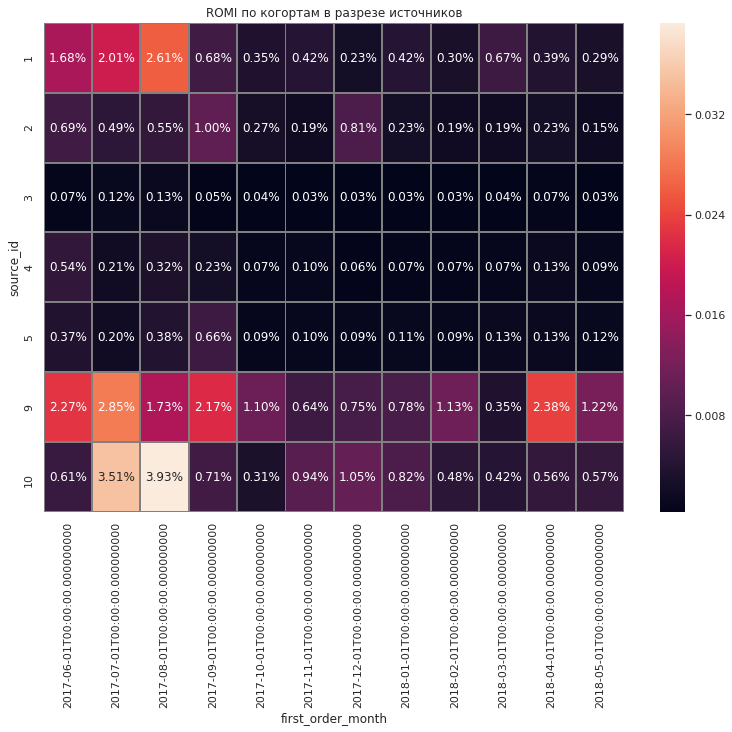

In [138]:
romi=itog_2.pivot_table(
    index='source_id', columns='first_order_month', values='romi', aggfunc='mean'
)

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('ROMI по когортам в разрезе источников')
sns.heatmap(romi, annot=True, fmt='.2%', linewidths=1, linecolor='gray'); 

<div class="alert alert-info">
<b> </b>
    
    
1.	9 источник окупился и принес прибыль у 8 когорт из 12;
    
    
2. 3,4,5 источники не окупились ни у одной из когорот.
    
    
3. Остальные источники только у нескольких когорт окупились.    
    

</div>

#### Окупаемость

In [139]:
orders_gr_visit_start.head()

first_order_month  cohort_lifetime                uid  revenue  \
0        2017-06-01                0  16233238570251706     1.65   
1        2017-06-01                0  29085576454138824     3.36   
2        2017-06-01                0  31782048561502182     6.11   
3        2017-06-01                0  50884319066603964     0.98   
4        2017-06-01                0  63862661827066303    15.88   

             start_ts  source_id start_date_month  costs_uid  
0 2017-06-06 20:16:00          3       2017-06-01  14.587286  
1 2017-06-08 11:21:00          5       2017-06-01   8.286439  
2 2017-06-03 11:12:00          3       2017-06-01  14.587286  
3 2017-06-08 13:14:00          3       2017-06-01  14.587286  
4 2017-06-14 12:16:00          4       2017-06-01   6.364485

In [140]:
orders_group=orders_gr_visit_start.groupby(
    ['first_order_month', 'cohort_lifetime']
).agg({'revenue': 'sum'}).reset_index()
print(orders_group.shape)
orders_group.head()

(78, 3)


first_order_month  cohort_lifetime  revenue
0        2017-06-01                0  8419.96
1        2017-06-01                1   813.72
2        2017-06-01                2   752.12
3        2017-06-01                3  1399.98
4        2017-06-01                4  1357.19

In [141]:
costs_gr_month
costs_gr_month = costs_gr_month.rename(columns=
                   {
                       'month': 'first_order_month',
                   }
                  )

In [142]:

costs_gr_month

first_order_month     costs
0         2017-06-01  18015.00
1         2017-07-01  18240.59
2         2017-08-01  14790.54
3         2017-09-01  24368.91
4         2017-10-01  36322.88
5         2017-11-01  37907.88
6         2017-12-01  38315.35
7         2018-01-01  33518.52
8         2018-02-01  32723.03
9         2018-03-01  30415.27
10        2018-04-01  22289.38
11        2018-05-01  22224.27

In [143]:
romi_group = orders_group.merge(costs_gr_month,on=['first_order_month'], how='left')
romi_group['costs']=romi_group['costs'].fillna(1)
print(romi_group.shape)
romi_group.head()

(78, 4)


first_order_month  cohort_lifetime  revenue    costs
0        2017-06-01                0  8419.96  18015.0
1        2017-06-01                1   813.72  18015.0
2        2017-06-01                2   752.12  18015.0
3        2017-06-01                3  1399.98  18015.0
4        2017-06-01                4  1357.19  18015.0

In [144]:
romi_group['romi']=romi_group['revenue']/romi_group['costs']

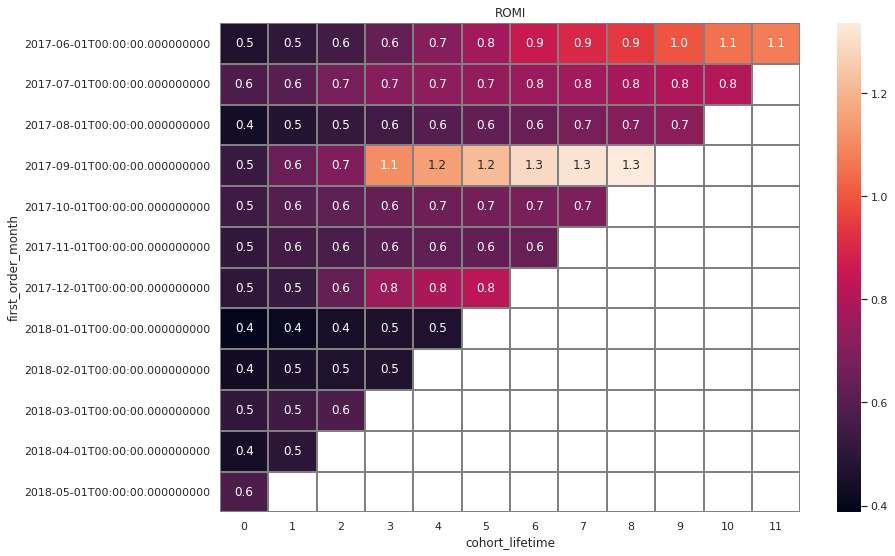

In [145]:
romi_2=romi_group.pivot_table(
    index='first_order_month', columns='cohort_lifetime', values='romi', aggfunc='mean'
)

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('ROMI')
sns.heatmap(romi_2.cumsum(axis=1), annot=True, fmt='.1f', linewidths=1, linecolor='gray'); 

<div class="alert alert-info">
<b> </b>  

Окупилась июньская когорта к концу девятого месяца и сентябрьская когорта к концу четвертого месяца.
    
Остальные когорты не окупились.
    
    

</div>

## Выводы и рекомендации

<div class="alert alert-info">
<b> </b>
    
**Средний чек** растет у каждой когорты, значит, в целом покупатели становятся лояльнее к продукту. Но возвращается от каждой когорты маленький процент.
    

**Количество уникальных пользователей** в день - 817 человек.
Количество посетителей значительно возрастает 24 ноября, 3090 посетителя за этот день.
Это может быть связано с днем матери, который 25 ноября.
А также есть рост посещений 31 мая, 1825 посетителей за этот день.
Это может быть связано с днем ребенка, который 1 июня.    
    
Если обобщить до месяцев, бОльшая посещаемость в ноябре- декабре и немного меньше февраль-март
Самая низкая посещаемость 30 и 31 марта, и в целом в летние месяцы.

Количество уникальных пользователей в неделю - 5245 человек.
Недельный график посещаемости подтверждает информацию о том, что в середине года, т.е. в летние месяцы значительно меньше заходов.
Конец года (последние 13 недель) и начало года - самые посещаемые.
Количество уникальных пользователей в месяц - 20952 человека.
    
Месячный график наглядно выделяет период с сентября по март включительно, в эти месяцы сервис Афиша наиболее востребован.
    
**% повторного пользования сервисом за год небольшой**    
99,48% посетителей заходят на сайт не более 10 раз за год; 
77.50% - 1 раз за год;      
13.50% - 2 раз за год;          
0,5% пользователей зашли от 10 до 200 раз за год;   
У 22 человек из 201 022 пользователей кол-во сессий за год больше 200.
В среднем пользователи проводят около 11 минут на сайте
Половина пользователей - до 6 минут.
75% пользователей - до 15 минут.

**Максимальный Retention Rate 8,4%.**
Retention Rate по всем когортам снижается.
Привлечённые пользователи пользуется сервисов повторно неохотно, что не очень хорошо для потенциальной выручки.    

Самый маленький **чек** в январе 2018 года, большой - декабрь 2017г.
В июне, сентябре и декабре 2017 пришли самые платежеспособные покупатели.
Средний чек растет у каждой когорты, значит в целом покупатели становятся лояльнее к продукту.
    
Средний чек по всем когортам за весь период - 5.

Средний **LTV** по когортам за 6 месяцев = 7,9
Самые ценные клиенты оказались в сентябрьской когорте, т.к. принесли в среднем со всех своих покупок больше денег.

**Расходы** по всем источникам увеличиваются осенью, пика достигают в ноябре, далее идет плавное снижение, исключением является 4 трафик, где в ноябре идет снижение и далее резкие подъемы и спады.

Расходы на 4 источник не соответствуют тенденция суммарных расходов.

Дороже всего обошлись августовские покупатели, а дешевле -майские.
Средний **САС** = 10.
    
**Источники**   
Дороже всего обошлись клиенты, привлеченные через 2 источник в декабре, январе, феврале.
Дороже всего обошлись клиенты, привлеченные через 1-3 источники, дешевле - через 4,5,9,10 источники.

1.	9 источник окупился и принес прибыль у 8 когорт из 12;
        
2.    3,4,5 источники не окупились ни у одной из когорот.
    
3. Остальные источники только у нескольких когорт окупились.    


**ROMI**
Окупилась июньская когорта к концу девятого месяца и сентябрьская когорта к концу четвертого месяца.
    
Остальные когорты не окупились.
    

</div>


